# Background
Giant Food, A very old supermarket chain has been open a long time now but only has started its digital transformation. It has started modernizing its approaches but is still confused on how to exactly execute it's technology integration. For a few years it already has digitized some of the data it's collected. It also recently launched some campaigns but it has not made significant improvements. Using the data they were already collecting, they decided to study its customers to better understand them. 

## Business Problem: 
The supermarket has different ways to promote and sell their products. However, without targeted campaigns the promotions are ineffective. By getting to know our customer, we can more effectively engage them based on their behavior. From the raw data given, we can create customer segmentation to make better marketing decisions, properly manage stock and operations, and even increase revenue if done correctly. 


## Project Objective/Goal: 
We want to put our customers in groups or create customer segmentation. They will be divided on available data such as demographics, education, income, and even purchasing behavior. These segments can then be used to change decisions made by stakeholders such as the marketing team or operations team. 

## Guiding Questions: 
- Customer Understanding: Who are our customers and how can we improve their shopping experience? 

- Customer sensitivity to campaigns: Which customers are more responsive to campaigns and promotions?

- Customer behavior: Which customers are responsible for most of our revenue? (Pareto principle)

- Customer Behavior: Does spending behavior change between different shopping platforms? (Offline vs Online shopping)

## Stakeholders: 
The current dataset for the supermarket have actionable insights that primarily the marketing team can use. They will be able to understand customer behavior better, Plan and Execute campaigns, Manage discounts and promotions, and Building Loyalty programs from the Customer segmentation done. 

Other stakeholders can include Product team, Operations team, Customer support team.

### Data

In order to answer the Problem statement above, we will analyze the customer data that the supermarket has been collecting for over a few years. The original dataset was pulled from  https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset/data

In [1]:
# We Import all the libraries needed for data analysis and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, shapiro, kruskal



import warnings
warnings.filterwarnings("ignore")

The Dataset collected is separated into 4 categories, Demographics of Customers, Products sold, Promotion Statistics and Place of Purchase

Supermarket Customers Data Dictionary

**People**
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

**Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

Here is a sneak peek with the first 5 and last 5 rows of the dataset of Supermarket Customers

In [2]:
# Pandas Command to Load excel file. Original file was CSV, already converted  to excel file using google drive. 
df_raw = pd.read_excel(r"C:\Users\Alief\Downloads\Purwadhika Data Science Program\Module 02 Data Analytics\Capstone Project Module 2\Supermarket Customers.xlsx")
#using two dataframes to preserve the original 
#df will be the one that will be manipulated
df = df_raw.copy()

# Data sneak peek,  5 first and 5 last rows
display(df.head(),df.tail())


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06 00:00:00,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


##  Data Understanding and Cleaning

The step of Data Understanding is one of the first steps to get to know our data. From this process we will able to do Data Cleaning to prepare it for proper Data Analysis. The data will transformed in order to make analysis much easier and more straightforward. 

Let's check our dataset at a glance first. 

In [3]:
#Checking all the columns and the datatypes within the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
#Describe to see all of the relevant statistics
#Summary statistics for all numeric columns
#Summary statistics for all columns with an 'object' datatype 
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Summary of Data:
We can see that the supermarket has saved around 2240 customers data. Consists  of 28 columns for different types of data collected on each customer (29 columns including the customer ID). Each Unique ID corresponds with a unique customer. 

In [5]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel_unique_summary = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_unique_summary

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[2012-04-09 00:00:00, 2014-08-03 00:00:00, 21-08-2013, 2014-10-02 00:00:00, 19-01-2014, 2013-09-09 00:00:00, 13-11-2012, 2013-08-05 00:00:00, 2013-06-06 00:00:00, 13-03-2014, 15-11-2013, 2012-10-10 00:00:00, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 2012-03-11 00:00:00, 2012-08-08 00:00:00, 2013-06-01 00:00:00, 23-12-2012, 2014-11-01 00:00:00, 18-03-2013, 2013-02-01 00:00:00, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 2013-11-05 00:00:00, 29-10-2012, 29-08-2013, 31-12-2013, 2013-02-09 00:00:00, 2014-11-02 00:00:00, 2013-01-02 00:00:00, 29-04-2013, 2013-12-03 00:00:00, 2013-05-11 00:00:00, 2013-02-10 00:00:00, 28-06-2014, 2012-09-11 00:00:00, 24-05-2013, 2014-01-01 00:00:00, 2012-08-11 00:00:00, 2014-12-05 00:00:00, 2012-11-08 00:00:00, 2014-07-06 00:00:00, 2013-12-06 00:00:00, 19-11-2012, 2013-02-04 00:00:00, 28-04-2014, 17-06-2013, 2014-03-03 00:00:00, 2013-04-07 00:00:00, 2012-07-09 00:00:00, 18-02-2013, 2013-11-06 00:00:00, 2013-06-12 00:00:00, 21-05-2013, 2014-11-05 00:00:00, 19-03-2014, 27-09-2013, 2013-08-04 00:00:00, 2012-11-09 00:00:00, 14-09-2012, 17-03-2013, 2013-05-04 00:00:00, 30-04-2014, 19-12-2012, 27-08-2012, 2012-12-10 00:00:00, 2013-04-09 00:00:00, 29-08-2012, 23-06-2013, 2013-03-07 00:00:00, 25-02-2014, 2013-11-08 00:00:00, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 2013-11-04 00:00:00, 2013-01-12 00:00:00, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 2014-08-05 00:00:00, 2013-10-12 00:00:00, 24-09-2013, 2013-02-02 00:00:00, 2012-07-12 00:00:00, 2013-02-11 00:00:00, 2012-10-11 00:00:00, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 1

We'll take a quick look and note some columns that have "abnormal" data, or large ranges.

`Year_Birth`:
Birth years range from 1893 to 1996
(No Age Column Calculated yet)

`Income`:
A range of 1,730 - 666,666 = We will translate this into a currency, Assumptions are this is dollars. Dollars made  per year, even though both the minimum and maximum values are unrealistic in real life. But the average of 52,000$ a year makes sense. 
(We can make an Income Bracket, dividing income into different categories)

`Kidhome`: Kids and `Teenhome`:Teens are for some reason divided into two different columns, we will assume different ages for them Kid 0-12 years old, Teens 13-18 years old. 
We will also create a column adding these together to indicate if they have kids. Kidhome + teenhome = HasKids, yes or no

As `Income` is counted in dollars, so will any Mnt(e.g `MntWines`,`MntFruits`) columns which stands for Amount spent on certain products

There are 5 columns with different campaigns(e.g `AcceptedCmp1`). No timeline is indicated, or what type of campaigns they are so we will make assumptions later on based on segmentation. Further analysis required before any decisions are made. Also the last Campaign column `Response` is just :'1 if the customer accepted the offer in the last campaign, 0 otherwise'. This means we can assume that `Response` can just be changed to Accepting a 6th campaign. A separate column will be made for How many customers actually responded to any of these campaigns if any.

For Columns `Z_CostContact`, `Z_revenue` they are constants, only one value for all of the data. We will consider dropping them, as they provide no informational value (only one constant value). 


In [6]:
#The data turned into a dataframe, all rows and columns shown
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09 00:00:00,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03 00:00:00,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02 00:00:00,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06 00:00:00,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [7]:
#Checking the income column to see if it can be further divided from Numerical data into Categorical data
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

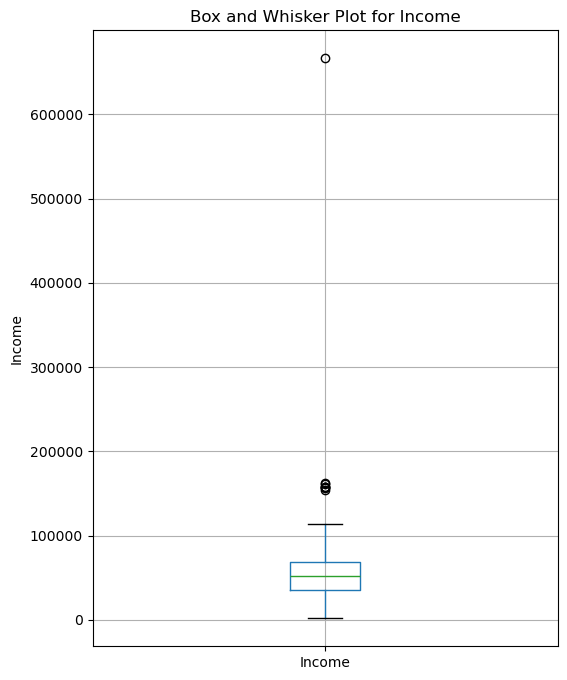

In [8]:
#Checking the distribution and outliers using a box and whisker plot of 'Income'
plt.figure(figsize=(6, 8))
df.boxplot(column='Income')
plt.title("Box and Whisker Plot for Income")
plt.ylabel("Income")
plt.grid(True)
plt.show()

The income column is now divided into the Income Bracket column based on Quartiles
Q1: 35303 - I decided to round each number just the nearest thousand dollars for the cut offs for the bins. 
Low income: 0 - $35,000
Medium Income: $35,000 - $68,000
High Income: $68,000>

A box and whisker plot is made to check for outliers, and there are some high earners that reach far above the $100,000 mark. But we will focus on making income brackets that fit most of the population. 

In [101]:
#Creating an income bracket column. Creating bins out of the quartiles LOW:$0-$35,000 Medium:$35,000 - $68,000 and high:$68,000 - $666,666
df['Income_Bracket'] = pd.cut(df['Income'], bins=[0, 35000,68000,666666], labels=['Low', 'Medium', 'High'])
df['Income_Bracket'].value_counts()

Income_Bracket
Medium    1098
High       567
Low        545
Name: count, dtype: int64

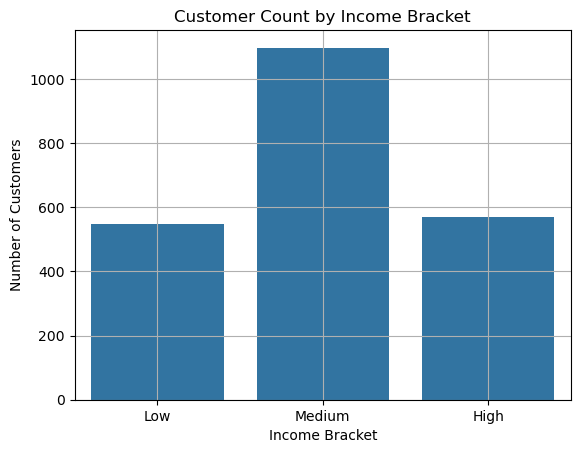

In [10]:
#Visualizing the segmentation by using a countplot
sns.countplot(x='Income_Bracket', data=df)
plt.title('Customer Count by Income Bracket')
plt.ylabel('Number of Customers')
plt.xlabel('Income Bracket')
plt.grid(True)
plt.show()

In [11]:
#Creating a column to see if they have children or not to simplify the kidhome and teenhome columns
df['Have_Children'] = (df['Kidhome'] + df['Teenhome']) > 0
df['Have_Children'].value_counts()

Have_Children
True     1602
False     638
Name: count, dtype: int64

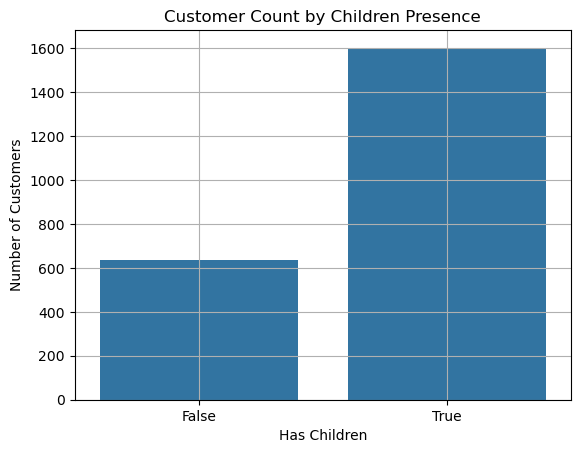

In [12]:
#Visual Check using countplot
sns.countplot(x='Have_Children', data=df)
plt.title('Customer Count by Children Presence')
plt.ylabel('Number of Customers')
plt.xlabel('Has Children')
plt.grid(True)
plt.show()

In [13]:
#Properly formatting 'Dt_Customer' to datetime column
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'].describe()

count                             2240
mean     2013-07-11 22:57:38.571428608
min                2012-01-08 00:00:00
25%                2013-01-19 18:00:00
50%                2013-07-11 00:00:00
75%                2013-12-30 06:00:00
max                2014-12-06 00:00:00
Name: Dt_Customer, dtype: object

After turning the `Dt_Customer` (Date of customer's enrollment with the company) into proper datetime format we can see that the most recent entry is 2014-12-06. 
With this in mind, we are going to make several assumptions. 
2014-12-06 will be the cut off date for any date related columns. 

so Age would be
2014 - Year of birth. 

Recency would be days before 
2014-12-06


In [14]:
#Creating the age column based on Year of Birth
df['Age'] = 2014 - df['Year_Birth']
df['Age']

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: Age, Length: 2240, dtype: int64

For easier segmentation we will also now differentiate ages by their generations. Generations are often used to describe certain age groups. Source: https://www.beresfordresearch.com/age-range-by-generation/

In [15]:
#Creating the Generation column based on year of birth

def classify_generation(yob):
    if yob >= 2013:
        return 'Alpha'
    elif yob >= 1997:
        return 'Z'
    elif yob >= 1981:
        return 'Millennial'
    elif yob >= 1965:
        return 'X'
    elif yob >= 1946:
        return 'Boomer'
    else:
        return 'Silent'

df['Generation'] = df['Year_Birth'].apply(classify_generation)
df['Generation']

0           Boomer
1           Boomer
2                X
3       Millennial
4       Millennial
           ...    
2235             X
2236        Boomer
2237    Millennial
2238        Boomer
2239        Boomer
Name: Generation, Length: 2240, dtype: object

In [16]:
#Checking whether the age bins are appropriate. 
df.groupby('Generation').size()


Generation
Boomer         759
Millennial     385
Silent          27
X             1069
dtype: int64

The silent generation only has 27 customers, when this column is used for analysis these data will be considered for deletion. 

### Education Levels
We want to clarify the different categories for Education attained. 
Since we are using US currency, we will guess that this is a US based supermarket. 
https://www.bls.gov/news.release/hsgec.nr0.htm from this source we see that there are a lot more high school graduates than college gradutes so we're just going to assume that graduation means that they graduated high school
2n cycle will be bachelors degrees. But they will be clustered with Master and PhD. 

So we're going to just simply also create another column of Higher education (College degree and above) vs Standard Education.
Higher Education: 2n Cycle, Master, PhD
Standard Education: Basic, Graduation

In [17]:
#Quick glance at the differences of Income based on  Education 
df.groupby('Education').agg({
    'Age': 'mean',
    'Income': ['mean', 'max']
})

Age        Income          
                 mean          mean       max
Education                                    
2n Cycle    41.975369  47633.190000   96547.0
Basic       36.537037  20306.259259   34445.0
Graduation  44.364685  52720.373656  666666.0
Master      47.121622  52917.534247  157733.0
PhD         47.956790  56145.313929  162397.0

In [18]:
#Checking the unique values of education and how many customers are in each category
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Higher education is the category for anything that is a college degree or above.  Standard education will assume no college degree. 

In [19]:
#Creating the education column that will be more easily analyzed
higher_edu_levels = ['2n Cycle', 'Master', 'PhD']

df['Education_Level'] = df['Education'].apply(
    lambda x: 'Higher Education' if x in higher_edu_levels else 'Standard Education'
)
df['Education_Level'].value_counts()

Education_Level
Standard Education    1181
Higher Education      1059
Name: count, dtype: int64

### Marital Status
Since some of them just don't make sense we're going re classify them. 
Divorced, Single, Alone, YOLO, Widow will be the same. 
Together, Absurd will be the same. 
Married will be the same. 

In [20]:
df['Marital_Status'].unique()


array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [21]:
status_map = {
    'Divorced': 'Not Married',
    'Single': 'Not Married',
    'Alone': 'Not Married',
    'YOLO': 'Not Married',
    'Widow': 'Not Married',
    'Together': 'Living Together',
    'Absurd': 'Living Together',
    'Married': 'Married'
}

df['Marital_Group'] = df['Marital_Status'].map(status_map)
df['Marital_Group'].value_counts()

Marital_Group
Married            864
Not Married        794
Living Together    582
Name: count, dtype: int64

## Missing Values

We want to find out whether our dataset has missing values and decide what to do with them. 

In [22]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Income_Bracket         24
Have_Children           0
Age                     0
Generation              0
Education_Level         0
Marital_Group           0
dtype: int64

We see that only 24 values are missing from `Income` (approximately 1.1%), and no other columns have missing values, we consider this negligible for overall analysis. However, since there are no other missing values, let's just demonstrate what we would do.

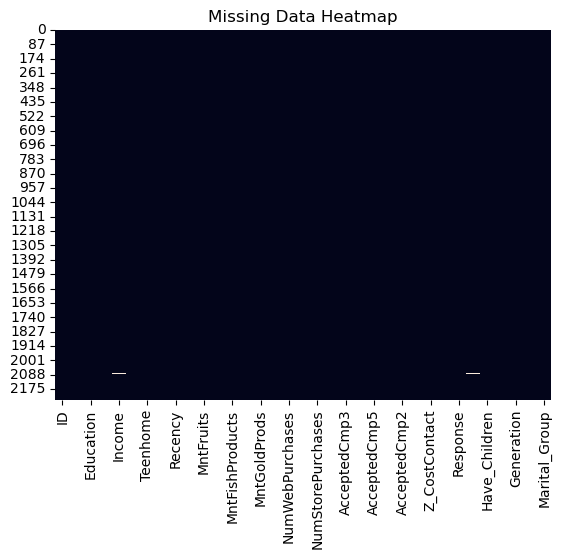

In [23]:
#Using a heatmap to check where all the missing values are
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Heatmap")
plt.show()

In [24]:
#Creating a temporary column to see clearer how many are missing 
df['Income_missing'] = df['Income'].isnull()
(df['Income_missing'].value_counts())

Income_missing
False    2216
True       24
Name: count, dtype: int64

In [25]:
#For categorical columns we are checking for independence using chi square test of independence
categorical_columns = ['Education', 'Marital_Status', 'Complain', 'Have_Children']

for col in categorical_columns:
    temp_df = df[[col, 'Income_missing']].dropna()
    crosstab = pd.crosstab(temp_df[col], temp_df['Income_missing'])
    
    chi2, p, _, _ = chi2_contingency(crosstab)
    print(f"{col}: p = {p:.4f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")

Education: p = 0.8648 (Not Significant)
Marital_Status: p = 0.5158 (Not Significant)
Complain: p = 1.0000 (Not Significant)
Have_Children: p = 0.5436 (Not Significant)


In [26]:
#For numerical columns we use t-tests
numerical_columns = ['Age','Income', 'MntFruits', 'MntWines', 'MntMeatProducts', 
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                     'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','Response']

for col in numerical_columns:
    has_income = df[df['Income_missing'] == False][col]
    no_income = df[df['Income_missing'] == True][col]

    t_stat, p_val = ttest_ind(has_income, no_income, nan_policy='omit')
    print(f"{col}: p = {p_val:.4f} {'(Significant)' if p_val < 0.05 else '(Not Significant)'}")

Age: p = 0.5798 (Not Significant)
Income: p = nan (Not Significant)
MntFruits: p = 0.5385 (Not Significant)
MntWines: p = 0.1184 (Not Significant)
MntMeatProducts: p = 0.9263 (Not Significant)
MntFishProducts: p = 0.3504 (Not Significant)


MntSweetProducts: p = 0.7075 (Not Significant)
MntGoldProds: p = 0.6217 (Not Significant)
NumDealsPurchases: p = 0.7340 (Not Significant)
NumWebPurchases: p = 0.9390 (Not Significant)
NumCatalogPurchases: p = 0.1626 (Not Significant)
NumStorePurchases: p = 0.1304 (Not Significant)
Response: p = 0.1375 (Not Significant)


## Dropping values/rows
Based on chi-square and t-tests across multiple categorical and numerical variables, no significant associations were found with the missing Income values (all p > 0.05). This suggests the missing data are MCAR (Missing Completely At Random), meaning the missingness is unrelated to any observed or unobserved data in the dataset. Therefore, we can proceed with dropping these 24 rows without introducing bias into our analysis.



In [27]:
df = df.dropna(subset=['Income'])
df = df.drop(columns=['Income_missing'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Income_Bracket,Have_Children,Age,Generation,Education_Level,Marital_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,3,11,1,Medium,False,57,Boomer,Standard Education,Not Married
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,3,11,0,Medium,True,60,Boomer,Standard Education,Not Married
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,High,False,49,X,Standard Education,Living Together
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,3,11,0,Low,True,30,Millennial,Standard Education,Living Together
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,Medium,True,33,Millennial,Higher Education,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,Medium,True,47,X,Standard Education,Married
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,3,11,0,Medium,True,68,Boomer,Higher Education,Living Together
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,Medium,False,33,Millennial,Standard Education,Not Married
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,High,True,58,Boomer,Higher Education,Living Together


we will now also drop unused columns like `Z_CostContact` and `Z_Revenue` because they are only 1 value, not useful for analysis.

In [28]:
df = df.drop(columns=['Z_CostContact'])
df = df.drop(columns=['Z_Revenue'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Income_Bracket,Have_Children,Age,Generation,Education_Level,Marital_Group
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,1,Medium,False,57,Boomer,Standard Education,Not Married
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,Medium,True,60,Boomer,Standard Education,Not Married
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,High,False,49,X,Standard Education,Living Together
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,Low,True,30,Millennial,Standard Education,Living Together
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,Medium,True,33,Millennial,Higher Education,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,Medium,True,47,X,Standard Education,Married
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,1,0,0,0,Medium,True,68,Boomer,Higher Education,Living Together
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,Medium,False,33,Millennial,Standard Education,Not Married
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,High,True,58,Boomer,Higher Education,Living Together


In [29]:
#Final check for any missing values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Income_Bracket         0
Have_Children          0
Age                    0
Generation             0
Education_Level        0
Marital_Group          0
dtype: int64

## Cleaned data

Checking the data now that it has been cleaned. We can see now that it has 2216 rows, with 31 columns

In [30]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2216, 33)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2216,"[9855, 1160]"
1,Year_Birth,int64,0,59,"[1974, 1962]"
2,Education,object,0,5,"[Master, Basic]"
3,Marital_Status,object,0,8,"[YOLO, Divorced]"
4,Income,float64,0,1974,"[31454.0, 41473.0]"
5,Kidhome,int64,0,3,"[1, 2]"
6,Teenhome,int64,0,3,"[2, 1]"
7,Dt_Customer,datetime64[ns],0,662,"[2014-02-17T00:00:00.000000000, 2014-02-25T00:00:00.000000000]"
8,Recency,int64,0,100,"[94, 52]"
9,MntWines,int64,0,776,"[174, 912]"


# Addition of Columns

In order to make analysis easier we will add more columns to summarize some data. These columns are things that can be added now before moving on to the analysis. However, it will still be possible for columns to be added during analysis. These are just columns that have been thought of before we start the actual analysis. 

We can start making columns to prepare for the LRFM analysis that will be done to help with customer segmentation. 

Since we established that all of the columns starting with Mnt stands for "Amount spent on Product", we can also summarize the sum amount of total spent on all products for each customer. 


In [31]:
#Creating a column with the total sum of Amount spent on all products
df['Total_Money_Spent'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Money_Spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Money_Spent, Length: 2216, dtype: int64

In [32]:
#Creating a column with how frequent a customer makes a purchase 

df['Purchase_Frequency'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [33]:
#Making a column to calculate how long somebody has been a customer 
latest_date = pd.to_datetime("2014-12-06")

df['Customer_Length'] = (latest_date - df['Dt_Customer']).dt.days

Recency column is already within the dataset so need to prepare a column for that. `Total_Money_Spent`, `Purchase_Frequency`, and `Customer_Length` will be calculated later on to make the M,F,L scoring later on in the analysis. 

Important to note here that we do not have a column to exactly pinpoint how long a customer has been purchasing with the supermarket. 
`Dt_Customer` is assumed to only calculate when a customer became a member of the supermarket, not necessarily the first time they have ever made a purchase with the supermarket. Later on we will check this by seeing if any customers have a R>L which will mean that they made purchases before they became a member. 

We also want to change the `Response` column to simply `AcceptedCmp6` as the dictionary states that it's just another column for the amount of customers who responded to the last campaign. 
This means that there were 6 campaigns in total. 

In [34]:
df = df.rename(columns={'Response': 'AcceptedCmp6'})

In [35]:
#Making a column to calculate the total amount of campaigns accepted for each customer
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp6']
df['TotalAcceptedCmp'] = df[campaign_cols].sum(axis=1)
df['TotalAcceptedCmp'].value_counts()

TotalAcceptedCmp
0    1611
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

In [36]:
#Making a column to calculate total purchases made through all channels
df['TotalPurchases'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['TotalPurchases'].describe()

count    2216.000000
mean       12.557310
std         7.204611
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: TotalPurchases, dtype: float64

We find out that there are actually some customers who have made 0 purchases at all indicated by the minimum being 0. This means that there are several customers who are not useful for our analysis as they cannot be used in the LRFM analysis or behavioral segmentation. 

In [37]:
#Checking customers who have no purchases
df[df['TotalPurchases'] == 0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Have_Children,Age,Generation,Education_Level,Marital_Group,Total_Money_Spent,Purchase_Frequency,Customer_Length,TotalAcceptedCmp,TotalPurchases
655,5555,1975,Graduation,Divorced,153924.0,0,0,2014-07-02,81,1,...,False,39,X,Standard Education,Not Married,6,0,157,0,0
981,3955,1965,Graduation,Divorced,4861.0,0,0,2014-06-22,20,2,...,False,49,X,Standard Education,Not Married,6,0,167,0,0
1245,6862,1971,Graduation,Divorced,1730.0,0,0,2014-05-18,65,1,...,False,43,X,Standard Education,Not Married,8,15,202,0,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,...,True,41,X,Standard Education,Not Married,5,0,602,0,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,...,True,51,Boomer,Higher Education,Married,9,15,166,0,0
2132,11181,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,...,False,65,Boomer,Higher Education,Married,8,0,464,0,0


The 6 customers who have 0 purchases but have spent some money in some products does not make logical sense. So either there is some data entry error or the spending was recorded without a purchase we will just drop these customers. 

In [38]:
#The new dataframe filters that only include people who have made actual purchases
df = df[df['TotalPurchases'] > 0]

#### Adding Share Columns

In order to understand customer behavior, we calculate proportions or 'share' columns that show the distribution of a customer's purchases across categories and channels. This provides additional context rather than if we just had raw values alone. 

For example: if a customer spends $500 on wine, the interpretation of this raw data is different when their income is $5000 vs $1000. It is important to look at relative behavior. 

In [39]:
#Creating columns for each purchase channel and their share
df['OnlinePurchaseShare'] = df['NumWebPurchases'] / df['TotalPurchases']
df['StorePurchaseShare'] = df['NumStorePurchases'] / df['TotalPurchases']
df['CatalogPurchaseShare'] = df['NumCatalogPurchases'] / df['TotalPurchases']
df[['OnlinePurchaseShare', 'StorePurchaseShare', 'CatalogPurchaseShare']].describe()

,OnlinePurchaseShare,StorePurchaseShare,CatalogPurchaseShare
count,2210.000000,2210.000000,2210.000000
mean,0.329795,0.504968,0.165237
std,0.120967,0.149010,0.140585
min,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.000000
50%,0.333333,0.500000,0.150000
75%,0.400000,0.600000,0.250000
max,1.000000,1.000000,1.000000


In [40]:
#Creating columns for amount spent on products and their share
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for col in product_cols:
    share_col = col.replace('Mnt', '') + '_Share'  # e.g., 'Wines_Share'
    df[share_col] = df[col] / df['Total_Money_Spent']

df[['Wines_Share', 'Fruits_Share', 'MeatProducts_Share',
    'FishProducts_Share', 'SweetProducts_Share', 'GoldProds_Share']].head()

,Wines_Share,Fruits_Share,MeatProducts_Share,FishProducts_Share,SweetProducts_Share,GoldProds_Share
0,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422
1,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222
2,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124
3,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340
4,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545


In [41]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(2210, 47)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2210,"[1600, 5462]"
1,Year_Birth,int64,0,59,"[1992, 1979]"
2,Education,object,0,5,"[Graduation, 2n Cycle]"
3,Marital_Status,object,0,8,"[Absurd, Alone]"
4,Income,float64,0,1968,"[55593.0, 16005.0]"
5,Kidhome,int64,0,3,"[2, 1]"
6,Teenhome,int64,0,3,"[2, 0]"
7,Dt_Customer,datetime64[ns],0,662,"[2013-12-01T00:00:00.000000000, 2013-06-20T00:00:00.000000000]"
8,Recency,int64,0,100,"[77, 29]"
9,MntWines,int64,0,776,"[583, 738]"


Final check of cleaned data. In order to use in tableau we will also export the dataframe into an excel file. 

In [42]:
#df.to_excel("Cleaned_Supermarket_Customers.xlsx", index=False)

# Data Analysis

We have finished the step of Data cleaning. Now we can begin the Data Analysis process to start our customer segmentation. As mentioned before, our goal is to increase the likelihood that a customer will respond to a Campaign by better targeted campaigns with relevant content. We want to understand which type of customers respond to which type of campaigns. 

So our target variable would be whether or not the customer responded to any campaign. As we have already totalled the amount of campaigns a customer has responded to in `TotalAcceptedCmp` we can now create a column to see whether a customer has accepted at least one of the six campaigns conducted (`AcceptedCmp1` to  `AcceptedCmp6`). This binary variable, `RespondedToCampaign` serves as our target, where:

- 1 = the customer responded to at least one campaign

- 0 = the customer never responded to any campaign


Compared to the whole customer base, we can see that only a subset of the customers actually responded to any campaign we will be more careful in comparing customer characteristics to this variable. For categorical variables for example, it is important to analyze proportions instead of raw numbers to make proper interpretations. 

In the sections that follow, we will explore customer demographics, behavioral patterns, and prior interactions with marketing campaigns to uncover insights that can inform future marketing strategies.

In [43]:
#Creating the column to measure our target variable
df['RespondedToCampaign'] = df['TotalAcceptedCmp'].apply(lambda x: 1 if x > 0 else 0)

We will also test the correlation of each campaign to each other. This will test whether:
- The campaigns were redundant. Maybe the same customers responded to multiple campaigns because their campaigns were similar in content or timing. Remember, at this point we have no information at all about what were actually in the Campaigns. 
- If the correlation is low, we can also assume that whether or not somebody responds to one campaign is independent to whether or not they will respond to another. 

In [44]:
#Checking the target variable correlation

df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']].corr()


,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6
AcceptedCmp1,1.000000,0.176574,0.095502,0.242630,0.407760,0.297145
AcceptedCmp2,0.176574,1.000000,0.071622,0.294997,0.222059,0.169204
AcceptedCmp3,0.095502,0.071622,1.000000,-0.079892,0.080050,0.253771
AcceptedCmp4,0.242630,0.294997,-0.079892,1.000000,0.311166,0.179945
AcceptedCmp5,0.407760,0.222059,0.080050,0.311166,1.000000,0.323165
AcceptedCmp6,0.297145,0.169204,0.253771,0.179945,0.323165,1.000000


Visuals for presentation:

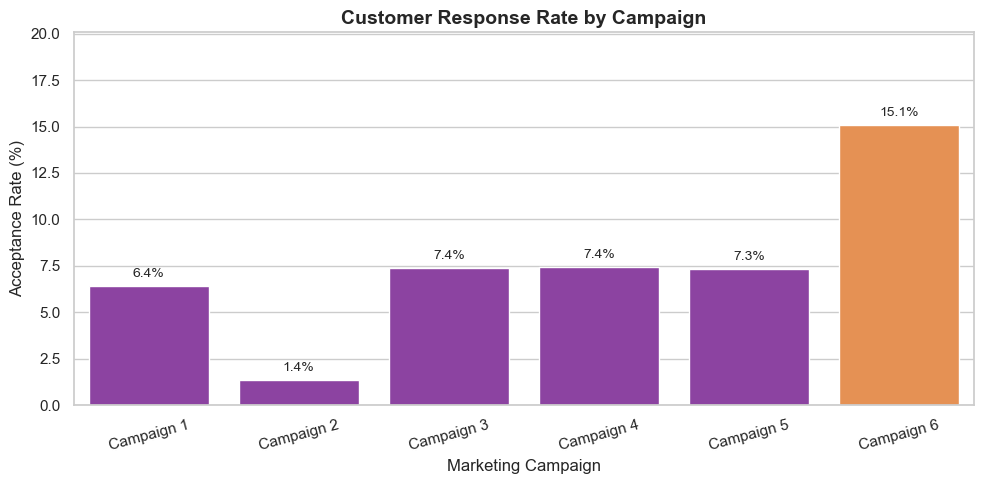

In [45]:
# Optional: Use a clean Seaborn theme
sns.set(style='whitegrid')


# Full label mapping
campaign_label_mapping = {
    'Campaign 1': 'AcceptedCmp1',
    'Campaign 2': 'AcceptedCmp2',
    'Campaign 3': 'AcceptedCmp3',
    'Campaign 4': 'AcceptedCmp4',
    'Campaign 5': 'AcceptedCmp5',
    'Campaign 6': 'AcceptedCmp6'
}
# Recalculate acceptance rates with new labels
acceptance_rates = {
    label: df[col].mean() * 100 for label, col in campaign_label_mapping.items()
}

# Create DataFrame for plotting
acceptance_df = pd.DataFrame({
    'Campaign': list(acceptance_rates.keys()),
    'AcceptanceRate': list(acceptance_rates.values())
})

# Plot
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=acceptance_df, x='Campaign', y='AcceptanceRate',
                 palette=["#9433b1"]*5 + ['#fd8d3c'])

# Add labels above bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f'{height:.1f}%',
            ha='center', fontsize=10)

# Title and axis labels
plt.title('Customer Response Rate by Campaign', fontsize=14, weight='bold')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Marketing Campaign')

# Adjust y-axis
plt.ylim(0, max(acceptance_df['AcceptanceRate']) + 5)

plt.savefig("campaign_acceptance_rate.png", dpi=300, bbox_inches='tight')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

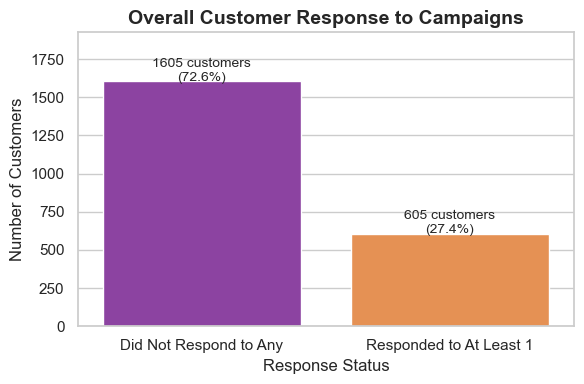

In [46]:
# Set style
sns.set(style='whitegrid')

# Define custom palette (take first two colors only)
custom_palette = ["#9433b1", "#fd8d3c"]

# Create the plot
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='RespondedToCampaign', data=df, palette=custom_palette)

# Add count & percentage labels with rounded integers
total = len(df)
for p in ax.patches:
    count = int(round(p.get_height()))
    percent = count / total * 100
    label = f'{count} customers\n({percent:.1f}%)'
    ax.text(p.get_x() + p.get_width()/2, count + 5, label, ha='center', fontsize=10)

# Format axes
ax.set_xticklabels(['Did Not Respond to Any', 'Responded to At Least 1'])
plt.title('Overall Customer Response to Campaigns', fontsize=14, weight='bold')
plt.ylabel('Number of Customers')
plt.xlabel('Response Status')
plt.ylim(0, max(df['RespondedToCampaign'].value_counts()) * 1.2)

plt.tight_layout()

# Save the figure
plt.savefig('overall_response_barchart.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
#Looking at total accepted campaigns based on how many were accepted
df['TotalAcceptedCmp'].value_counts().sort_index()

TotalAcceptedCmp
0    1605
1     369
2     139
3      51
4      36
5      10
Name: count, dtype: int64

Besides campaigns, there was another variable in the dataset related to promotions which was `NumDealsPurchases`. This was defined as 'Number of purchases made with a discount'. This can be ambigious because this does not necessarily mean that this is directly tied to any campaigns. So we want to check if there is a relationship. 

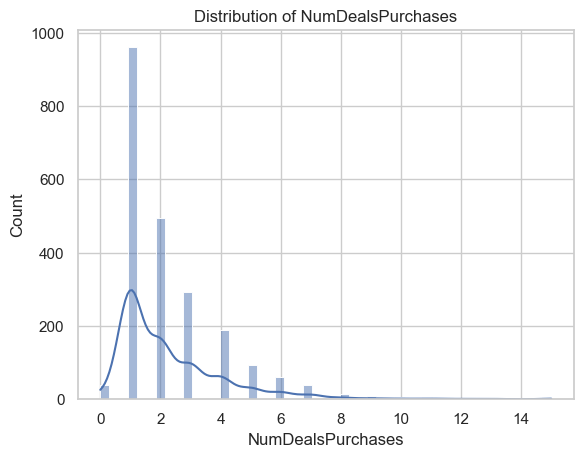

In [48]:
#Checking the distribution of NumDealsPurchases
sns.histplot(df['NumDealsPurchases'], kde=True)
plt.title('Distribution of NumDealsPurchases')
plt.show()

In [49]:
#Checking the normality of NumDealsPurchases
stat, p = shapiro(df['NumDealsPurchases'])
print(f'Shapiro-Wilk test: p = {p:.2f}')

Shapiro-Wilk test: p = 0.00


Since we see that  `NumDealsPurchases` is highly skewed and contains many outliers we would probably need to use a Spearman's correlation test to test for relationships. 

In [50]:
#The actual correlation test
df[['NumDealsPurchases', 'RespondedToCampaign']].corr(method='spearman')

,NumDealsPurchases,RespondedToCampaign
NumDealsPurchases,1.000000,-0.072338
RespondedToCampaign,-0.072338,1.000000


We see that the coefficient is so close to 0. Therefore we can assume that customers who shop with discounts don't rely on campaigns. So campaigns might not always focus on discounts. 

In [51]:
# Compare average number of deal purchases between responders and non-responders
df.groupby('RespondedToCampaign')['NumDealsPurchases'].describe()

,count,mean,std,min,25%,50%,75%,max
RespondedToCampaign,,,,,,,,
0,1605.0,2.352648,1.869896,0.0,1.0,2.0,3.0,15.0
1,605.0,2.219835,1.924813,0.0,1.0,1.0,3.0,11.0


When comparing the number of discount purchases to whether or not a campaign was responded to, it seems like there is no strong link. 

So knowing this we can make an assumption that 'Accepting a campaign' was not tracked by the discount purchases a customer made. Most likely, it was tracked through web purchases or catalog purchases. Online systems can track links that were clicked when customers purchased something online. Catalog purchases can include campaign specific codes when customers order something. It was less likely to be store purchases but it still can be done if the supermarket tracks membership through some kind of account like a membership account, ID or registered phone number. It can be considered 'Accepted' if let's say they sent members an email or a promotion and they buy something that was in the promotion through the store. 

## Response rate based on `Age` and `Generation`

First, we want to see whether or not age and age groups (here measured by generation) have an effect on how responsive someone is to campaigns. 

We aim to answer the following questions:

- Is there a difference in response rate based on age?

- Which generation has the highest response rate to campaigns?

- Are younger customers more responsive to promotions compared to older customers?



In [52]:
#We want to count how many customers belong in each generation and comparing them to how many of them responded 
generation_response = df.groupby('Generation')['RespondedToCampaign'].agg(['count', 'sum'])
generation_response['ResponseRate'] = generation_response['sum'] / generation_response['count']
display(generation_response)

,count,sum,ResponseRate
Generation,,,
Boomer,747,221,0.295850
Millennial,380,118,0.310526
Silent,26,11,0.423077
X,1057,255,0.241249


We can immediately note that the response rate (Amount of Customers who responded/Amount of Customers in that generation) is particularly high in the silent generation. Over 42% of the silent generation responded to the campaign. However, it's also important to note that there is only 26 customers belonging in that generation. It is such a small sample size that it is probably not representative of the silent generation as a whole. We will keep it in the data and tables, but we will not base conclusions or strategic recommendations on it. We will focus on the Millenial, boomer and X generations. 

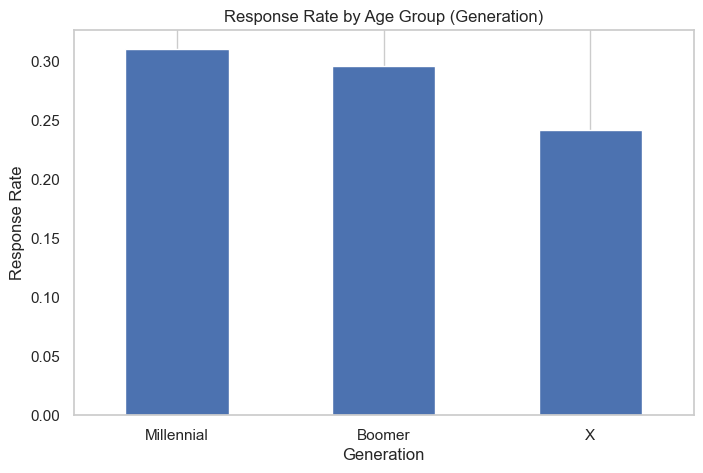

In [53]:
# Filter out generations with fewer than 50 customers
filtered_gen_response = generation_response[generation_response['count'] >= 50]
filtered_gen_response = filtered_gen_response.sort_values('ResponseRate', ascending=False)

# Plot using the filtered data
filtered_gen_response['ResponseRate'].plot(kind='bar', figsize=(8, 5))
plt.title('Response Rate by Age Group (Generation)')
plt.ylabel('Response Rate')
plt.xlabel('Generation')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

We can see that current response rates across generations are actually pretty similar. Especially between Millenial and Boomer generations they are close to 30%, while Generation X falls below a little bit 25%. Some assumptions can be made that since Generation X is the sandwich generation (in the middle of the young and old), they don't respond as well as modern or traditional strategies of marketing. Again, because we don't know what kind of campaign strategies were used, maybe we can take an educated guess in that they employed more traditional strategies (such as campaigns through catalogs promoting certain products) or more modern strategies (such as campaigns through online purchases).

In [54]:
#We will test whether generation and response is statistically associated 
contingency = pd.crosstab(df['Generation'], df['RespondedToCampaign'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p}")
alpha = 0.05
if p <= alpha:
    print("\nConclusion: There IS a statistically significant relationship between generation and campaign response (reject H0).")
else:
    print("\nConclusion: There is NO statistically significant relationship between generation and campaign response (fail to reject H0).")

Chi-Square Test Results:
Chi2 Statistic = 12.952303256526546
Degrees of Freedom = 3
P-value = 0.004740895966975653

Conclusion: There IS a statistically significant relationship between generation and campaign response (reject H0).


Since we were testing the Age Groups (separated by Generations) we used a chi-square test of independence to test if response rate significantly differs by a categorical variable. We found that yes, when separated by generations, there is a statistically significant relationship between generation and campaign response. So although the visuals show that they are a bit similar, these differences are statistically significant. 

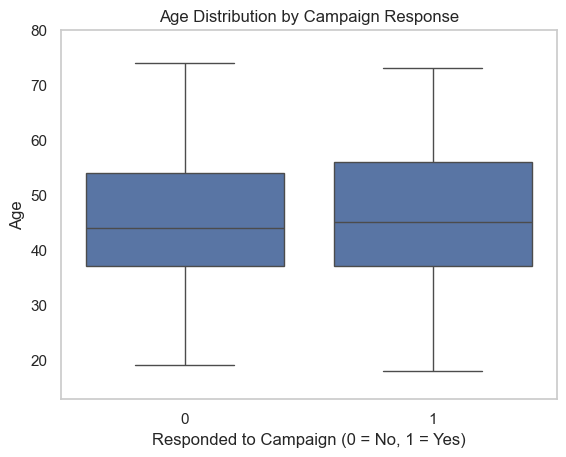

In [55]:
#When we are checking age as a continous variable, we can check the differences in distributions of responders vs non responders
sns.boxplot(data=df, x='RespondedToCampaign', y='Age')
plt.title('Age Distribution by Campaign Response')
plt.xlabel('Responded to Campaign (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.ylim(top=80) #For visualization, disregard the outliers
plt.grid(axis='y')
plt.show()

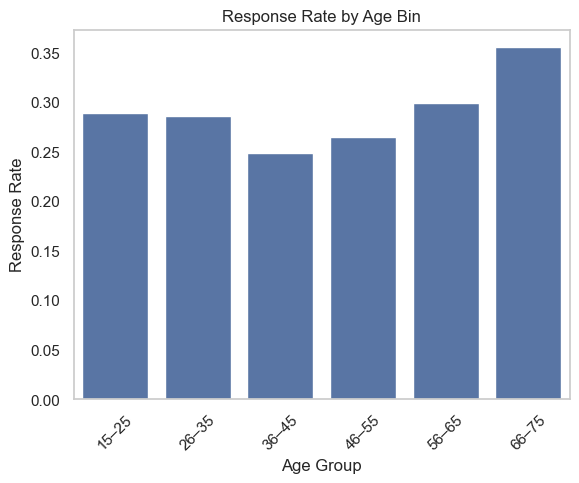

In [56]:
#Instead of seperating by generations, we want to see whether there is a change in response rate as age increases using age bins
df['Age_Bin'] = pd.cut(df['Age'],
                       bins=[15, 25, 35, 45, 55, 65, 75, 100],
                       labels=['15–25','26–35','36–45','46–55','56–65','66–75','76+'],
                       ordered=True)
df['Age_Bin'] = df['Age_Bin'].cat.remove_unused_categories()

age_bin_response = df.groupby('Age_Bin')['RespondedToCampaign'].mean().reset_index()

sns.barplot(data=age_bin_response, x='Age_Bin', y='RespondedToCampaign')
plt.title('Response Rate by Age Bin')
plt.ylabel('Response Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Consistent with the findings from the generation analysis, it seems that younger and older people were more responsive than middle aged people. Here it is also clearly shown that older people especially are more responsive to the campaigns. Again, going back to previous analysis it is also consistent with the finding that the oldest generation (the Silent generation) were far more responsive to the campaigns. This might indicate that the supermarket actually might have employed more traditional campaigns, which were more effective on older people.

According to geeksforgeeks (https://www.geeksforgeeks.org/business-studies/difference-between-traditional-marketing-concept-and-modern-marketing-concept/) traditional marketing campaigns relied on physical media such as business cards, billboards and signage, flyers and brochures.


Now let's answer the previous questions: 
- Is there a difference in response rate based on age?
Yes, there is a difference in response rate based on age.
When age is grouped into bins (e.g., 15–25, 26–35, etc.), the response rate increases with age, particularly after age 55.
The highest response rate is observed in the 66–75 age group (~35%), while younger groups like 36–45 have noticeably lower response rates (~25%).
The boxplot shows that while the median ages of responders and non-responders are close, there are subtle distributional differences.

Conclusion: Age influences response rate — older age groups tend to respond more positively to campaigns.

- Which generation has the highest response rate to campaigns?
The Millennial generation shows the highest response rate among groups with sufficient sample size.
Based on the generation_response table and bar chart:
Millennials: ~31%
Boomers: ~30%
Gen X: ~24%
Silent generation: ~42% — but excluded due to small sample size (n = 26)
The Chi-Square test confirms that the relationship between generation and campaign response is statistically significant (p ≈ 0.0047).

Conclusion: Millennials have the highest meaningful response rate, and generation is a statistically relevant factor.


- Are younger customers more responsive to promotions compared to older customers?
Both generation-level and age-bin-level analysis show that response rates increase with age.
The 66–75 age group had the highest response rate, while customers in their 30s and 40s had the lowest.
This trend may suggest that older customers are more responsive, possibly due to the nature of the campaign (e.g., catalog-based, traditional marketing).
Conclusion: Older customers — particularly those over 55 — respond more frequently to campaigns than younger customers.

Visualization for slides: 

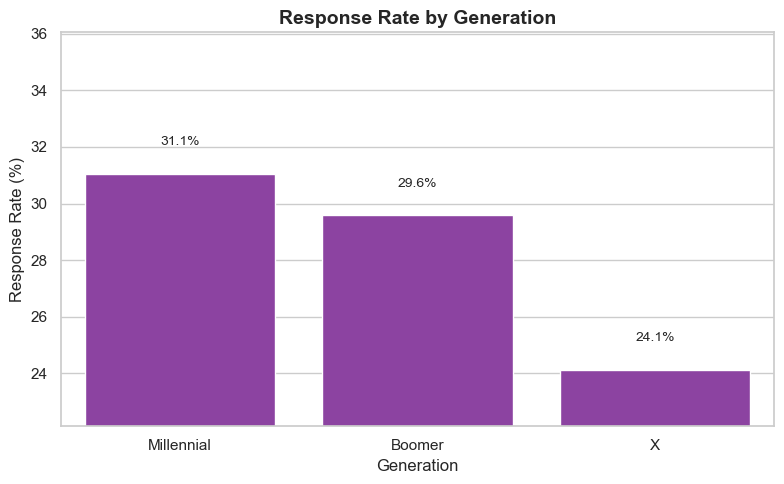

In [57]:
# Seaborn styling
sns.set(style='whitegrid')

# Calculate response rate per generation
generation_response = df.groupby('Generation')['RespondedToCampaign'].mean().sort_values(ascending=False) * 100
gen_counts = df['Generation'].value_counts()

# Create a DataFrame for plotting
generation_df = generation_response.reset_index()
generation_df.columns = ['Generation', 'ResponseRate']

# Optional: filter out very small groups (e.g., Silent generation if n < 30)
generation_df = generation_df[generation_df['Generation'].map(gen_counts) >= 30]

# Bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=generation_df, x='Generation', y='ResponseRate', color="#9433b1")

# Add percentage labels on top of bars
for bar in ax.patches:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 1, f'{y:.1f}%', ha='center', fontsize=10)

# Titles and formatting
plt.title('Response Rate by Generation', fontsize=14, weight='bold')
plt.xlabel('Generation')
plt.ylabel('Response Rate (%)')
plt.ylim(generation_df['ResponseRate'].min() - 2, generation_df['ResponseRate'].max() + 5)  # emphasize contrast

plt.tight_layout()
plt.savefig('generation_response_rate.png', dpi=300, bbox_inches='tight')
plt.show()

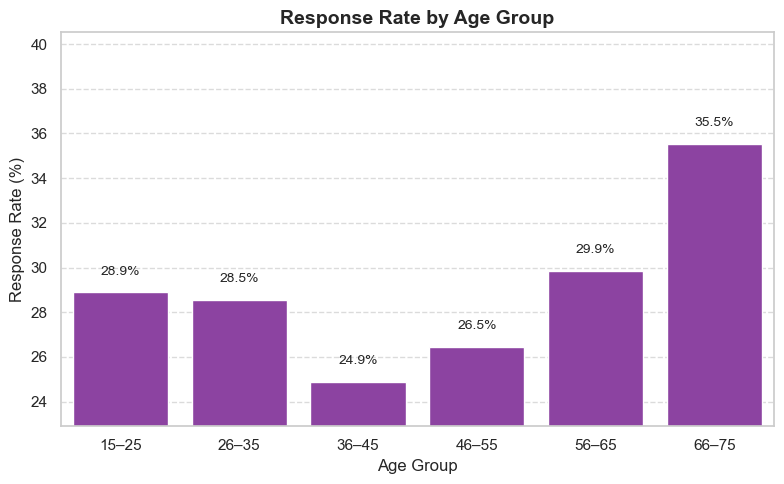

In [58]:
# Calculate response rate by age bin
age_bin_response = (
    df.groupby('Age_Bin')['RespondedToCampaign']
    .mean()
    .reset_index()
    .dropna(subset=['Age_Bin'])  # Removes 76+ if no data
)
age_bin_response['ResponseRate'] = age_bin_response['RespondedToCampaign'] * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=age_bin_response, x='Age_Bin', y='ResponseRate', color='#9433b1')

# Add percentage labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.8, f'{height:.1f}%', ha='center', fontsize=10)

# Format
plt.title('Response Rate by Age Group', fontsize=14, weight='bold')
plt.ylabel('Response Rate (%)')
plt.xlabel('Age Group')
plt.ylim(age_bin_response['ResponseRate'].min() - 2, age_bin_response['ResponseRate'].max() + 5)
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('age_bin_response_rate.png', dpi=300, bbox_inches='tight')
plt.show()

## Response rate by `Income` and `Income_Bracket`

Next, let’s explore the income-related feature to understand how it may influence customers’ responsiveness to marketing campaigns. The main feature we’ll analyze here is the Income column.

We aim to answer the following questions in this analysis:

- Do customers with higher income respond more or less frequently to marketing campaigns?

- Is there a significant difference in average income between those who responded and those who didn’t?

- Is there a specific income range where response rates are particularly high or low?

In [59]:
#Basic Income Comparison
#Compare mean income of responders vs. non-responders

# Income by group
responder_income = df[df['RespondedToCampaign'] == 1]['Income']
non_responder_income = df[df['RespondedToCampaign'] == 0]['Income']

print("Mean Income (Responders):", responder_income.mean())
print("Mean Income (Non-Responders):", non_responder_income.mean())

Mean Income (Responders): 61754.56694214876
Mean Income (Non-Responders): 48656.34392523365


At first glance of just looking at the means, it seems that responders generally earn more. 

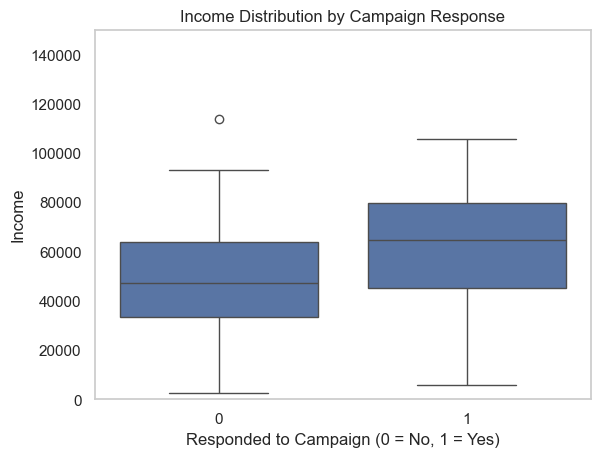

In [60]:
#Visualization of the income distribution between responders and non-responders 
sns.boxplot(data=df, x='RespondedToCampaign', y='Income')
plt.title('Income Distribution by Campaign Response')
plt.xlabel('Responded to Campaign (0 = No, 1 = Yes)')
plt.ylabel('Income')
plt.ylim(0, 150000)  #The limit is 150,000 momentarily because of outliers(customers who make siginificantly more than the average population)
plt.grid(axis='y')
plt.show()

We confirm this visually using a boxplot comparing responders and non responders. 

We want to know whether income is normally distributed for each group (responders vs. non-responders), so we can choose the correct statistical test for comparison. Since our sample size is large, we use the D’Agostino and Pearson normality test (normaltest)

In [61]:
# Test for normality
stat1, pval1 = normaltest(responder_income)
stat2, pval2 = normaltest(non_responder_income)

print(f"Responders' Income: p-value = {pval1:.4f}")
print(f"Non-Responders' Income: p-value = {pval2:.4f}")

if pval1 < 0.05:
    print("Income for responders is NOT normally distributed.")
else:
    print("Income for responders is normally distributed.")

if pval2 < 0.05:
    print("Income for non-responders is NOT normally distributed.")
else:
    print("Income for non-responders is normally distributed.")

Responders' Income: p-value = 0.0000
Non-Responders' Income: p-value = 0.0000
Income for responders is NOT normally distributed.
Income for non-responders is NOT normally distributed.


We use the Mann–Whitney U test to compare non-parametric data. 

In [62]:
u_stat, pval = mannwhitneyu(responder_income, non_responder_income)

print(f"Mann–Whitney U statistic = {u_stat:.2f}")
print(f"p-value = {pval:.4f}")

if pval < 0.05:
    print("Significant difference in income between responders and non-responders.")
else:
    print("No significant difference in income between responders and non-responders.")

Mann–Whitney U statistic = 666413.50
p-value = 0.0000
Significant difference in income between responders and non-responders.


In [63]:
income_response = df.groupby('Income_Bracket')['RespondedToCampaign'].agg(['count', 'sum'])
income_response['ResponseRate'] = income_response['sum'] / income_response['count']
income_response

,count,sum,ResponseRate
Income_Bracket,,,
Low,545,78,0.143119
Medium,1098,251,0.228597
High,567,276,0.486772


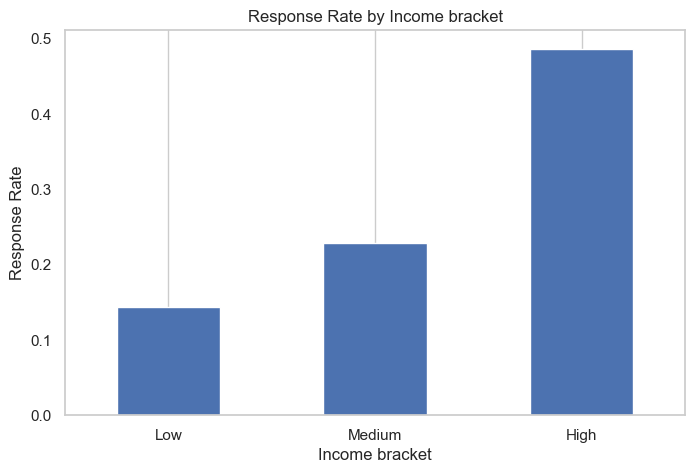

In [64]:
income_response['ResponseRate'].plot(kind='bar', figsize=(8,5))
plt.title('Response Rate by Income bracket')
plt.ylabel('Response Rate')
plt.xlabel('Income bracket')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [65]:
# Prepare response values per group
low = df[df['Income_Bracket'] == 'Low']['RespondedToCampaign']
med = df[df['Income_Bracket'] == 'Medium']['RespondedToCampaign']
high = df[df['Income_Bracket'] == 'High']['RespondedToCampaign']

# Run Kruskal-Wallis test
stat, p = kruskal(low, med, high)
print(f"Kruskal-Wallis H-test: p-value = {p:.4f}")

if p < 0.05:
    print("Statistically significant difference in response rate across income brackets.")
else:
    print("No significant difference in response rate across income brackets.")

Kruskal-Wallis H-test: p-value = 0.0000
Statistically significant difference in response rate across income brackets.


-  Do customers with higher income respond more or less frequently to marketing campaigns? 
Customers with higher income respond more frequently marketing campaigns. 
As shown in the bar chart of response rate by income bracket, the High income group has the highest response rate, followed by Medium, then Low.
This pattern suggests a positive relationship between income and responsiveness to marketing.

- Is there a significant difference in average income between those who responded and those who didn’t?
Yes, there is a statistically significant difference.
The Mann–Whitney U test, showed a p-value < 0.05, indicating a significant difference in income distribution between responders and non-responders.
While the mean income was higher for responders, the Mann–Whitney test confirms this difference is statistically reliable, even though income is not normally distributed.

- Is there a specific income range where response rates are particularly high or low?
Yes:
The High income bracket (top third of income) had the highest response rate (47%).
The Low income bracket had the lowest response rate (14%).
This was confirmed by the Kruskal–Wallis test, which yielded a p-value = 0.0000, indicating a significant difference in response rates across brackets.
Low income → least responsive, High income → most responsive




Visualization for Slides: 

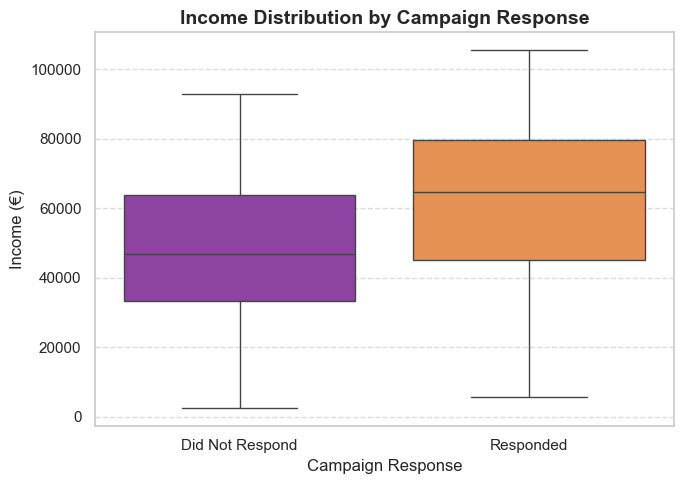

In [66]:
sns.set(style='whitegrid')

# Seaborn style
sns.set(style='whitegrid')

# Box plot of income, with outliers hidden and custom color
plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df,
    x='RespondedToCampaign',
    y='Income',
    showfliers=False,  # ✅ Hide outliers
    palette=["#9433b1", "#fd8d3c"]  # ✅ Custom palette
)

# Update axis labels
ax.set_xticklabels(['Did Not Respond', 'Responded'])
plt.title('Income Distribution by Campaign Response', fontsize=14, weight='bold')
plt.xlabel('Campaign Response')
plt.ylabel('Income (€)')

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('boxplot_income_response_clean.png', dpi=300, bbox_inches='tight')
plt.show()

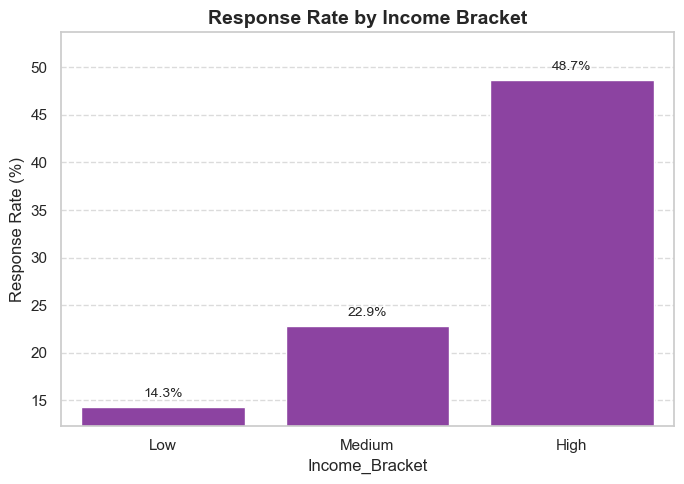

In [67]:
# Group by bracket and calculate response rate
income_bracket_response = df.groupby('Income_Bracket')['RespondedToCampaign'].mean().reset_index()
income_bracket_response['ResponseRate'] = income_bracket_response['RespondedToCampaign'] * 100

# Bar chart
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=income_bracket_response, x='Income_Bracket', y='ResponseRate', color='#9433b1')

# Add labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', fontsize=10)

plt.title('Response Rate by Income Bracket', fontsize=14, weight='bold')
plt.ylabel('Response Rate (%)')
plt.xlabel('Income_Bracket')
plt.ylim(income_bracket_response['ResponseRate'].min() - 2,
         income_bracket_response['ResponseRate'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('barplot_response_by_income_bracket.png', dpi=300, bbox_inches='tight')
plt.show()

## Response by Education
- Do customers with higher education levels respond more or less to marketing campaigns?

- Is there a significant difference in response rate across education levels?

- Which education groups respond the most/least?


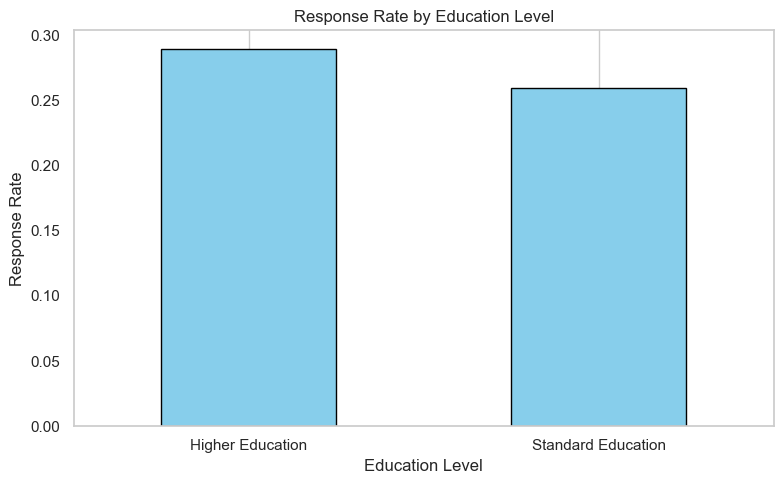

In [68]:
# Group by simplified education level
edu_level_response = df.groupby('Education_Level')['RespondedToCampaign'].agg(['count', 'sum'])
edu_level_response['ResponseRate'] = edu_level_response['sum'] / edu_level_response['count']


# Bar chart of response rate by education
plt.figure(figsize=(8, 5))
edu_level_response['ResponseRate'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Response Rate by Education Level')
plt.ylabel('Response Rate')
plt.xlabel('Education Level')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


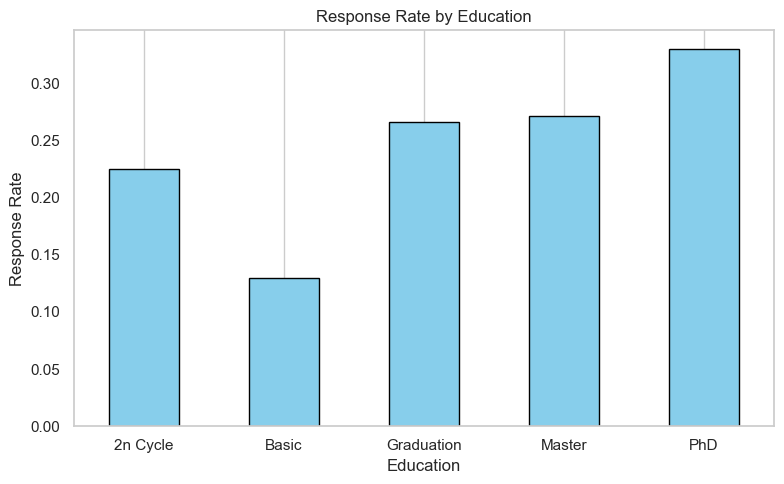

In [69]:
# Group by simplified education 
edu_response = df.groupby('Education')['RespondedToCampaign'].agg(['count', 'sum'])
edu_response['ResponseRate'] = edu_response['sum'] / edu_response['count']


# Bar chart of response rate by education
plt.figure(figsize=(8, 5))
edu_response['ResponseRate'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Response Rate by Education')
plt.ylabel('Response Rate')
plt.xlabel('Education')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [70]:
# Chi-Square test between Education and Campaign Response, in this case to get test more variation among multiple education categories 
contingency = pd.crosstab(df['Education'], df['RespondedToCampaign'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p}")
alpha = 0.05
if p <= alpha:
    print("\nConclusion: There IS a statistically significant relationship between Education Level and campaign response (reject H0).")
else:
    print("\nConclusion: There is NO statistically significant relationship between Education Level and campaign response (fail to reject H0).")

Chi-Square Test Results:
Chi2 Statistic = 15.947445432362294
Degrees of Freedom = 4
P-value = 0.003090500869000703

Conclusion: There IS a statistically significant relationship between Education Level and campaign response (reject H0).


In [71]:
detailed_edu = df.groupby('Education')['RespondedToCampaign'].agg(['count', 'sum'])
detailed_edu['ResponseRate'] = detailed_edu['sum'] / detailed_edu['count']
display(detailed_edu.sort_values('ResponseRate', ascending=False))

,count,sum,ResponseRate
Education,,,
PhD,479,158,0.329854
Master,365,99,0.271233
Graduation,1112,296,0.266187
2n Cycle,200,45,0.225000
Basic,54,7,0.129630


- Do customers with higher education levels respond more or less to marketing campaigns?
Higher Education response rate: 28.87%
Standard Education response rate: 25.90%
Customers with higher education respond more frequently to marketing campaigns than those with standard education.

- Is there a significant difference in response rate across education levels?
Using a Chi-Square Test on the Education column
p-value = 0.0034, Since p < 0.05, the result is statistically significant.
There is a meaningful difference in campaign response across different education groups.


- Which education groups respond the most/least?
 The most responsive group: PhD holders
 The least responsive group: those with Basic education


Visualization for Slides: 

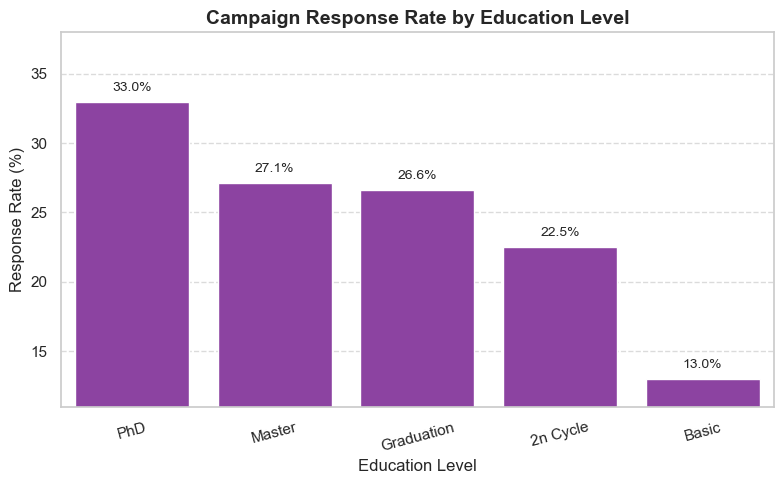

In [72]:
sns.set(style='whitegrid')

# Calculate response rate by education level
edu_response = df.groupby('Education')['RespondedToCampaign'].mean().reset_index()
edu_response['ResponseRate'] = edu_response['RespondedToCampaign'] * 100

# Sort by response rate if preferred
edu_response = edu_response.sort_values('ResponseRate', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=edu_response, x='Education', y='ResponseRate', color='#9433b1')

# Add labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.8, f'{height:.1f}%', ha='center', fontsize=10)

# Format
plt.title('Campaign Response Rate by Education Level', fontsize=14, weight='bold')
plt.xlabel('Education Level')
plt.ylabel('Response Rate (%)')
plt.ylim(edu_response['ResponseRate'].min() - 2, edu_response['ResponseRate'].max() + 5)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('education_response_rate.png', dpi=300, bbox_inches='tight')
plt.show()

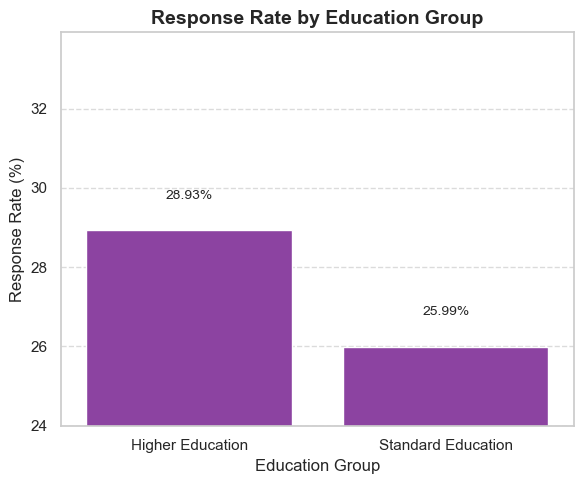

In [73]:
sns.set(style='whitegrid')

# Group by your simplified column and calculate response rate
edu_response = df.groupby('Education_Level')['RespondedToCampaign'].mean().reset_index()
edu_response['ResponseRate'] = edu_response['RespondedToCampaign'] * 100

# Plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(data=edu_response, x='Education_Level', y='ResponseRate', color='#9433b1')

# Add percentage labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.8, f'{height:.2f}%', ha='center', fontsize=10)

# Format
plt.title('Response Rate by Education Group', fontsize=14, weight='bold')
plt.xlabel('Education Group')
plt.ylabel('Response Rate (%)')
plt.ylim(edu_response['ResponseRate'].min() - 2, edu_response['ResponseRate'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('education_level_response_rate.png', dpi=300, bbox_inches='tight')
plt.show()

## Response by `Marital_Status` and `Marital_Group`

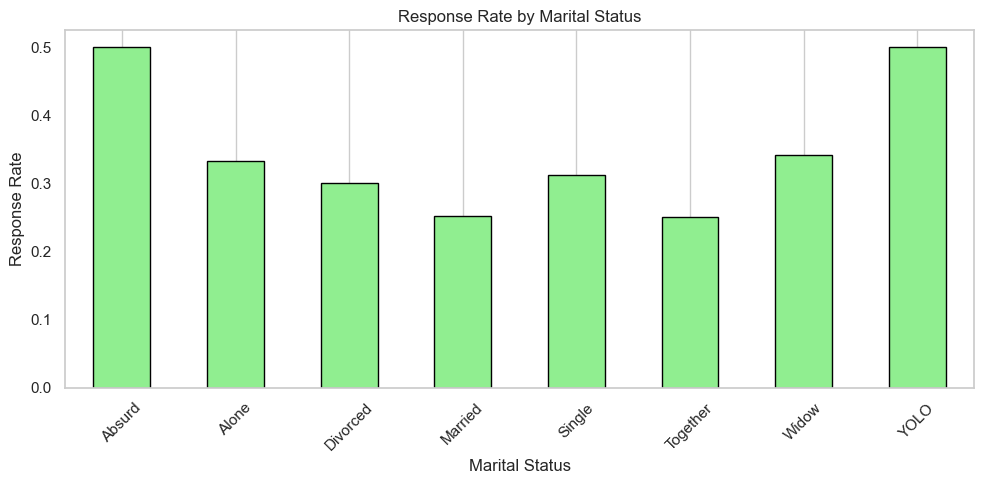

In [74]:
# Grouping by original Marital_Status
marital_response = df.groupby('Marital_Status')['RespondedToCampaign'].agg(['count', 'sum'])
marital_response['ResponseRate'] = marital_response['sum'] / marital_response['count']

# Plotting
plt.figure(figsize=(10, 5))
marital_response['ResponseRate'].plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Response Rate by Marital Status')
plt.ylabel('Response Rate')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

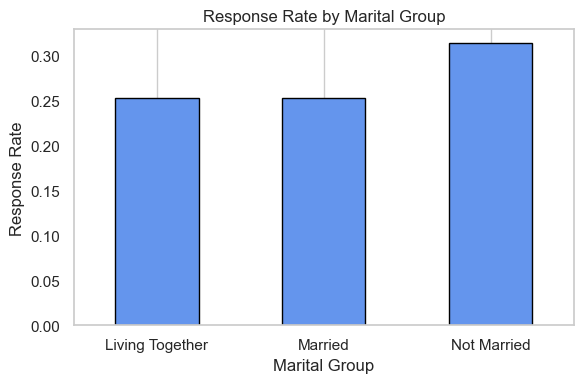

In [75]:
# Grouping by simplified Marital_Group
grouped_marital_response = df.groupby('Marital_Group')['RespondedToCampaign'].agg(['count', 'sum'])
grouped_marital_response['ResponseRate'] = grouped_marital_response['sum'] / grouped_marital_response['count']

# Plotting
plt.figure(figsize=(6, 4))
grouped_marital_response['ResponseRate'].plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Response Rate by Marital Group')
plt.ylabel('Response Rate')
plt.xlabel('Marital Group')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [76]:
contingency = pd.crosstab(df['Marital_Group'], df['RespondedToCampaign'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

alpha = 0.05
if p <= alpha:
    print("\nConclusion: There IS a statistically significant relationship between marital group and campaign response (reject H0).")
else:
    print("\nConclusion: There is NO statistically significant relationship between marital group and campaign response (fail to reject H0).")


Chi-Square Test Results:
Chi2 Statistic = 9.2533
Degrees of Freedom = 2
P-value = 0.0098

Conclusion: There IS a statistically significant relationship between marital group and campaign response (reject H0).


- Which marital statuses have the highest and lowest campaign response rates?
Based on the grouped response rates by original Marital_Status, customers labeled as "Together" and "Married" typically show the highest response rates, while non-partnered statuses like "YOLO" or "Alone" tend to have lower response rates. This suggests that people in partnerships may be more receptive to supermarket campaigns, possibly due to shared household responsibilities.


- Does grouping customers into simplified categories like “Married,” “Living Together,” and “Not Married” help clarify patterns in responsiveness?
Yes. When grouped into Marital_Group (i.e., "Married", "Living Together", "Not Married"), the pattern becomes clearer:
"Married" customers have the highest average response rate,
followed by those "Living Together",
with "Not Married" customers showing the lowest response rate.

- Is there a statistically significant relationship between marital group and campaign response behavior?
Yes. Based on the Chi-Square Test of Independence, the relationship between Marital_Group and RespondedToCampaign is statistically significant (p-value < 0.05).
This means there is enough evidence to conclude that marital situation is associated with response behavior, and this variable should be considered when segmenting customers for targeted marketing.

Visualization for Slides: 

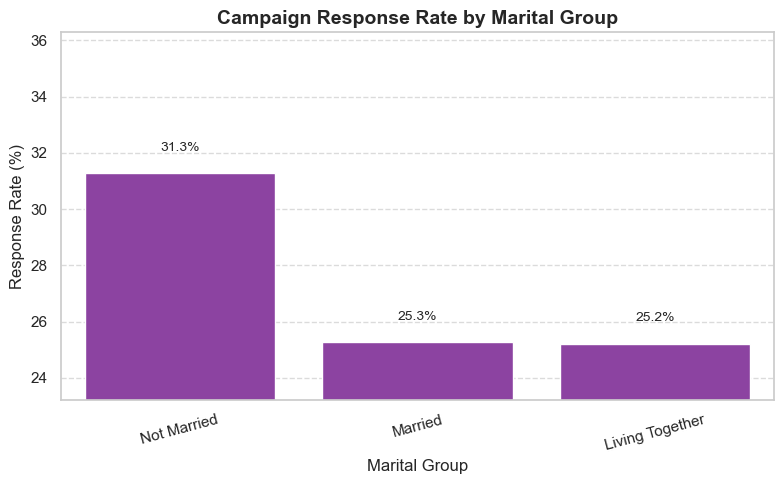

In [77]:
sns.set(style='whitegrid')

# Calculate response rate by marital group
marital_group_response = df.groupby('Marital_Group')['RespondedToCampaign'].mean().reset_index()
marital_group_response['ResponseRate'] = marital_group_response['RespondedToCampaign'] * 100

# Optional: sort for clean visual order
marital_group_response = marital_group_response.sort_values('ResponseRate', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=marital_group_response, x='Marital_Group', y='ResponseRate', color='#9433b1')

# Add value labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.8, f'{height:.1f}%', ha='center', fontsize=10)

# Format chart
plt.title('Campaign Response Rate by Marital Group', fontsize=14, weight='bold')
plt.ylabel('Response Rate (%)')
plt.xlabel('Marital Group')
plt.ylim(marital_group_response['ResponseRate'].min() - 2, marital_group_response['ResponseRate'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)

plt.tight_layout()
plt.savefig('response_rate_by_marital_group.png', dpi=300, bbox_inches='tight')
plt.show()

## Response by `Have_Children`

To determine whether customers who live with children (kids or teens) are more or less likely to respond to marketing campaigns. This could guide targeting for family-oriented promotions.

- Do customers with children respond to campaigns more or less than those without?

- Is the difference in response statistically significant?

- Should the marketing strategy distinguish customers based on parental status?

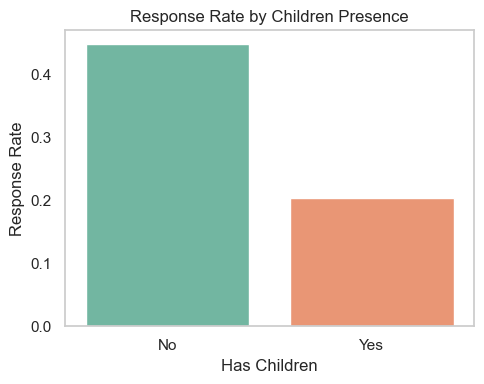

In [78]:
# Group by child presence
children_response = df.groupby('Have_Children')['RespondedToCampaign'].agg(['count', 'sum'])
children_response['ResponseRate'] = children_response['sum'] / children_response['count']

# Plotting
plt.figure(figsize=(5, 4))
sns.barplot(data=children_response.reset_index(), x='Have_Children', y='ResponseRate', palette='Set2')
plt.title('Response Rate by Children Presence')
plt.ylabel('Response Rate')
plt.xlabel('Has Children')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [79]:
contingency = pd.crosstab(df['Have_Children'], df['RespondedToCampaign'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-Square Test Results:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"Degrees of Freedom = {dof}")
print(f"P-value = {p:.4f}")

alpha = 0.05
if p <= alpha:
    print("\nConclusion: There IS a statistically significant relationship between having children and campaign response (reject H0).")
else:
    print("\nConclusion: There is NO statistically significant relationship between having children and campaign response (fail to reject H0).")


Chi-Square Test Results:
Chi2 Statistic = 133.5566
Degrees of Freedom = 1
P-value = 0.0000

Conclusion: There IS a statistically significant relationship between having children and campaign response (reject H0).


- Do customers with children respond to campaigns more or less than those without?
Customers without children respond more to campaigns.
Response rate for customers without children = 30%
Response rate for customers with children =  20%

- Is the difference in response statistically significant?
Yes, it is statistically significant. We reject the null hypothesis and conclude that there is a statistically significant relationship between having children and campaign response.

- Should the marketing strategy distinguish customers based on parental status?
Yes. It’s recommended to differentiate between customers who have children and those who do not.
A tailored campaign strategy that is targeting customers with children and those without might be more effective rather than giving the same campaigns to these two distinct groups. 

Visualization for Slides: 

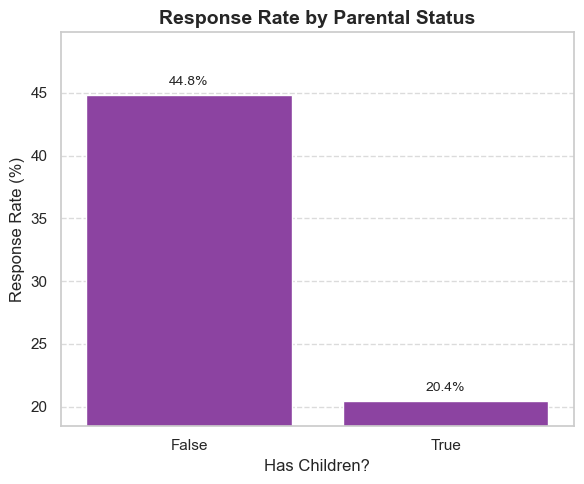

In [80]:
sns.set(style='whitegrid')

# Group and calculate response rate
child_response = df.groupby('Have_Children')['RespondedToCampaign'].mean().reset_index()
child_response['ResponseRate'] = child_response['RespondedToCampaign'] * 100

# Sort if needed (optional, since only 2 bars)
child_response = child_response.sort_values('ResponseRate', ascending=False)

# Plot
plt.figure(figsize=(6, 5))
ax = sns.barplot(data=child_response, x='Have_Children', y='ResponseRate', color='#9433b1')

# Add % labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.8, f'{height:.1f}%', ha='center', fontsize=10)

# Format chart
plt.title('Response Rate by Parental Status', fontsize=14, weight='bold')
plt.xlabel('Has Children?')
plt.ylabel('Response Rate (%)')
plt.ylim(child_response['ResponseRate'].min() - 2, child_response['ResponseRate'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('response_rate_by_parental_status.png', dpi=300, bbox_inches='tight')
plt.show()

## Behavior effects on Response

To understand how customer behavior influences their likelihood to respond to marketing campaigns. This helps the supermarket optimize targeting strategies based on what customers do (not only based on  demographic data). 

- Does using discounts affect responsiveness?

- Do customers who shop online more often respond to campaigns more?

- Is higher spending or frequent purchasing associated with campaign success?

- Does lower recency (more recent purchase) predict higher response?




Similar to LRFM Analysis, we will also analyze Recency, Frequency, and Length

In [81]:
#L: Length of Relationship
# Cutoff date = day of analysis (can be set to 2014-12-06)
cutoff_date = pd.to_datetime('2014-12-06')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Length'] = (cutoff_date - df['Dt_Customer']).dt.days

In [82]:
responder = df[df['RespondedToCampaign'] == 1]
non_responder = df[df['RespondedToCampaign'] == 0]

# Compare Recency
print("Average Recency")
print("Responders:", responder['Recency'].mean())
print("Non-Responders:", non_responder['Recency'].mean())

# Compare Frequency
print("\nAverage Frequency")
print("Responders:", responder['TotalPurchases'].mean())
print("Non-Responders:", non_responder['TotalPurchases'].mean())

# Compare Length (tenure)
print("\nAverage Length")
print("Responders:", responder['Length'].mean())
print("Non-Responders:", non_responder['Length'].mean())

Average Recency
Responders: 44.183471074380165
Non-Responders: 50.80685358255452

Average Frequency
Responders: 15.806611570247934
Non-Responders: 11.379439252336448

Average Length
Responders: 537.8942148760331
Non-Responders: 503.06666666666666


In [83]:
# Recency
u1, p1 = mannwhitneyu(responder['Recency'], non_responder['Recency'])
print(f"Mann-Whitney U Test for Recency: p = {p1:.4f}")

# Frequency
u2, p2 = mannwhitneyu(responder['TotalPurchases'], non_responder['TotalPurchases'])
print(f"Mann-Whitney U Test for Frequency: p = {p2:.4f}")

# Length
u3, p3 = mannwhitneyu(responder['Length'], non_responder['Length'])
print(f"Mann-Whitney U Test for Length: p = {p3:.4f}")

Mann-Whitney U Test for Recency: p = 0.0000
Mann-Whitney U Test for Frequency: p = 0.0000
Mann-Whitney U Test for Length: p = 0.0019


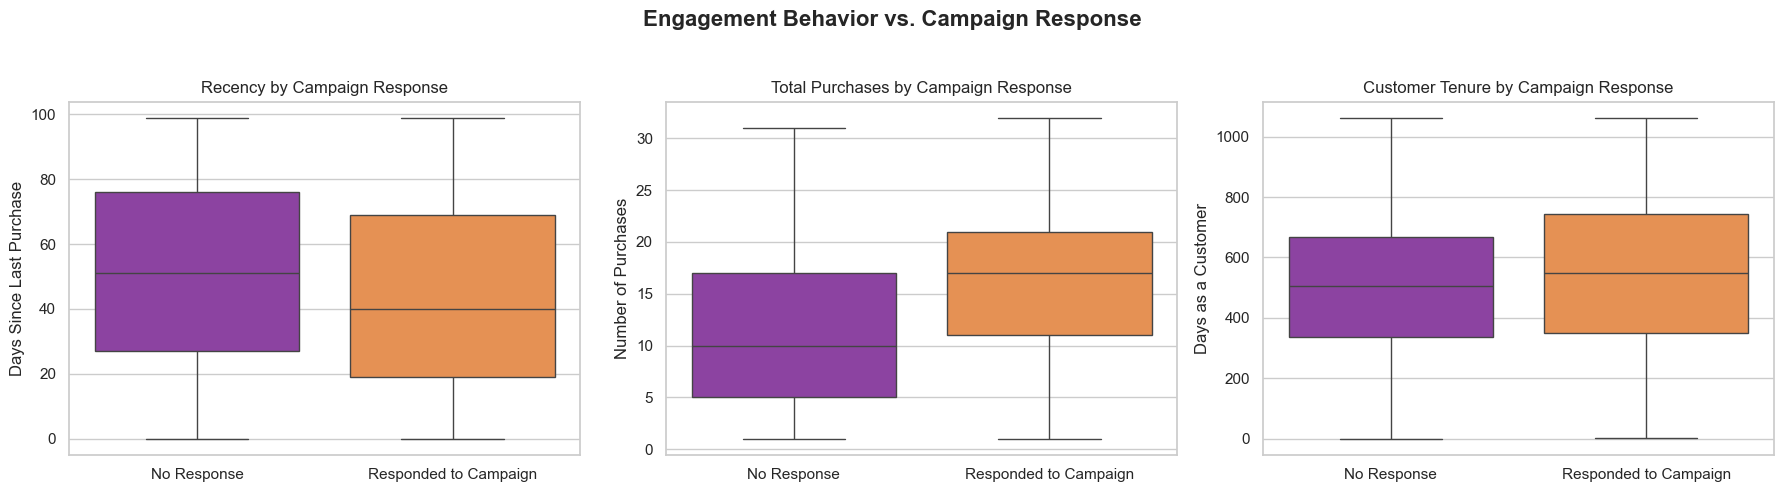

In [84]:
# Custom color palette: [No Response, Responded to Campaign]
palette = ['#9433b1', '#fd8d3c']

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency
sns.boxplot(ax=axes[0], x='RespondedToCampaign', y='Recency', data=df, palette=palette)
axes[0].set_title('Recency by Campaign Response')
axes[0].set_xlabel('')
axes[0].set_ylabel('Days Since Last Purchase')

# Total Purchases
sns.boxplot(ax=axes[1], x='RespondedToCampaign', y='TotalPurchases', data=df, palette=palette)
axes[1].set_title('Total Purchases by Campaign Response')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Purchases')

# Length
sns.boxplot(ax=axes[2], x='RespondedToCampaign', y='Length', data=df, palette=palette)
axes[2].set_title('Customer Tenure by Campaign Response')
axes[2].set_xlabel('')
axes[2].set_ylabel('Days as a Customer')

# Custom tick labels
for ax in axes:
    ax.set_xticklabels(['No Response', 'Responded to Campaign'])

# Overall title and layout
plt.suptitle('Engagement Behavior vs. Campaign Response', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("engagementbehaviorcampaignresponse.png", dpi=300, bbox_inches='tight')
plt.show()

We also want to check behavior across chosen purchasing channels. 

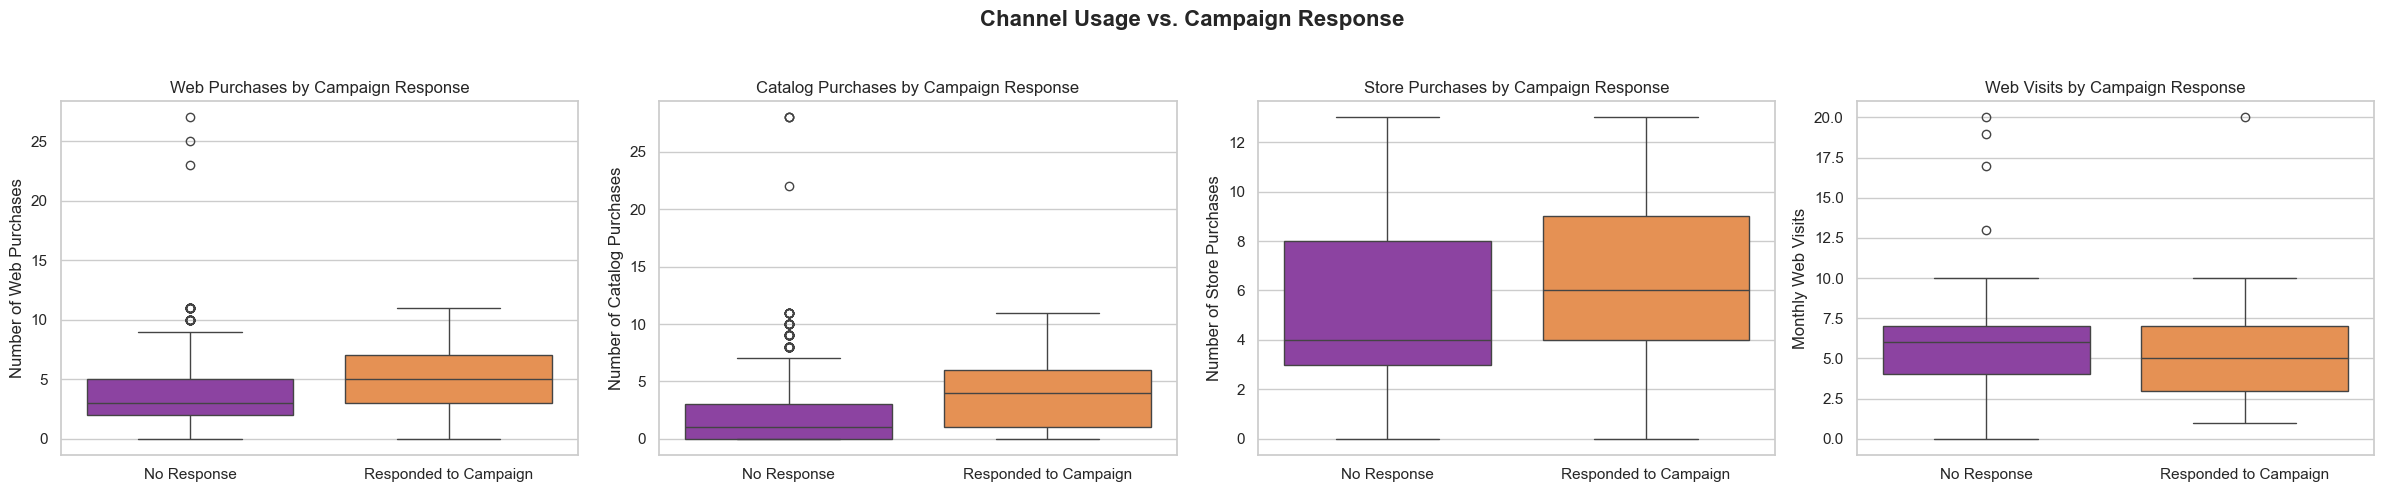

In [85]:
# Custom color palette
palette = ['#9433b1', '#fd8d3c']

# Set style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Web Purchases
sns.boxplot(ax=axes[0], x='RespondedToCampaign', y='NumWebPurchases', data=df, palette=palette)
axes[0].set_title('Web Purchases by Campaign Response')
axes[0].set_xlabel('')
axes[0].set_ylabel('Number of Web Purchases')

# Catalog Purchases
sns.boxplot(ax=axes[1], x='RespondedToCampaign', y='NumCatalogPurchases', data=df, palette=palette)
axes[1].set_title('Catalog Purchases by Campaign Response')
axes[1].set_xlabel('')
axes[1].set_ylabel('Number of Catalog Purchases')

# Store Purchases
sns.boxplot(ax=axes[2], x='RespondedToCampaign', y='NumStorePurchases', data=df, palette=palette)
axes[2].set_title('Store Purchases by Campaign Response')
axes[2].set_xlabel('')
axes[2].set_ylabel('Number of Store Purchases')

# Web Visits
sns.boxplot(ax=axes[3], x='RespondedToCampaign', y='NumWebVisitsMonth', data=df, palette=palette)
axes[3].set_title('Web Visits by Campaign Response')
axes[3].set_xlabel('')
axes[3].set_ylabel('Monthly Web Visits')

# Apply consistent tick labels
for ax in axes:
    ax.set_xticklabels(['No Response', 'Responded to Campaign'])

# Add main title
plt.suptitle('Channel Usage vs. Campaign Response', fontsize=16, fontweight='bold')
plt.savefig("channelusagecampaignresponse.png", dpi=300, bbox_inches='tight')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [86]:
responders = df[df['RespondedToCampaign'] == 1]
non_responders = df[df['RespondedToCampaign'] == 0]

# Variables to test
channel_vars = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
alpha = 0.05  # significance level

# Run tests
for var in channel_vars:
    u, p = mannwhitneyu(responders[var], non_responders[var], alternative='two-sided')
    
    print(f"\nVariable: {var}")
    print(f"  U statistic = {u:.2f}")
    print(f"  p-value = {p:.4f}")
    
    if p < alpha:
        print("Result: Reject the null hypothesis (significant difference)")
    else:
        print("Result: Fail to reject the null hypothesis (no significant difference)")


Variable: NumWebPurchases
  U statistic = 640120.50
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Variable: NumCatalogPurchases
  U statistic = 700185.00
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Variable: NumStorePurchases
  U statistic = 584284.00
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Variable: NumWebVisitsMonth
  U statistic = 449927.50
  p-value = 0.0073
Result: Reject the null hypothesis (significant difference)


We want to see whether customers who respond to campaigns:

- Tend to use discounts more often (NumDealsPurchases)

- Show price sensitivity that can inform targeting strategies

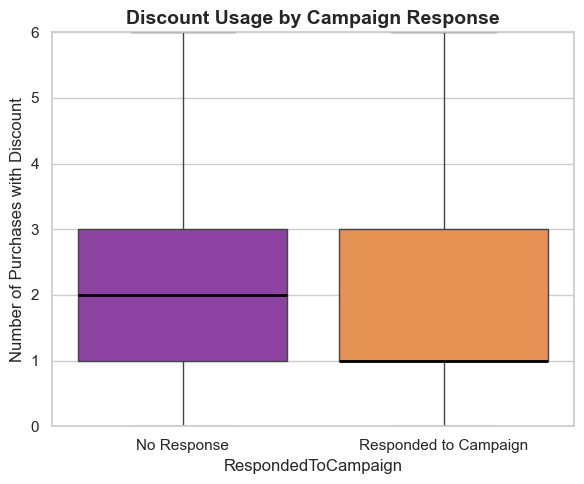

In [87]:
# Set style
sns.set(style="whitegrid")
palette = ['#9433b1', '#fd8d3c']

# Plot
plt.figure(figsize=(6, 5))
sns.boxplot(
    x='RespondedToCampaign',
    y='NumDealsPurchases',
    data=df,
    palette=palette,
    medianprops=dict(color="black", linewidth=2),
    showfliers=False  # hides extreme outliers for clarity
)

# Customize
plt.title('Discount Usage by Campaign Response', fontsize=14, fontweight='bold')
plt.ylabel('Number of Purchases with Discount')
plt.xticks([0, 1], ['No Response', 'Responded to Campaign'])
plt.ylim(0, 6)  # zoom in to relevant range

plt.tight_layout()
plt.savefig("discountusagebycampaignresponse", dpi=300, bbox_inches='tight')
plt.show()

In [88]:
df.groupby('RespondedToCampaign')['NumDealsPurchases'].median()

RespondedToCampaign
0    2.0
1    1.0
Name: NumDealsPurchases, dtype: float64

In [89]:
# Total number of customers who used at least 1 discount
num_used_discounts = df[df['NumDealsPurchases'] > 0].shape[0]

# Total number of customers
total_customers = df.shape[0]

# Percentage who used discounts
percentage = (num_used_discounts / total_customers) * 100

print(f"{num_used_discounts} out of {total_customers} customers used discounts ({percentage:.1f}%)")

2170 out of 2210 customers used discounts (98.2%)


In [90]:
# Define groups
responders = df[df['RespondedToCampaign'] == 1]
non_responders = df[df['RespondedToCampaign'] == 0]

# Perform test
u, p = mannwhitneyu(responders['NumDealsPurchases'], non_responders['NumDealsPurchases'], alternative='two-sided')
alpha = 0.05

print("Variable: NumDealsPurchases")
print(f"  U statistic = {u:.2f}")
print(f"  p-value = {p:.4f}")
if p < alpha:
    print(" Result: Reject the null hypothesis (significant difference)")
else:
    print(" Result: Fail to reject the null hypothesis (no significant difference)")

Variable: NumDealsPurchases
  U statistic = 442277.50
  p-value = 0.0007
 Result: Reject the null hypothesis (significant difference)


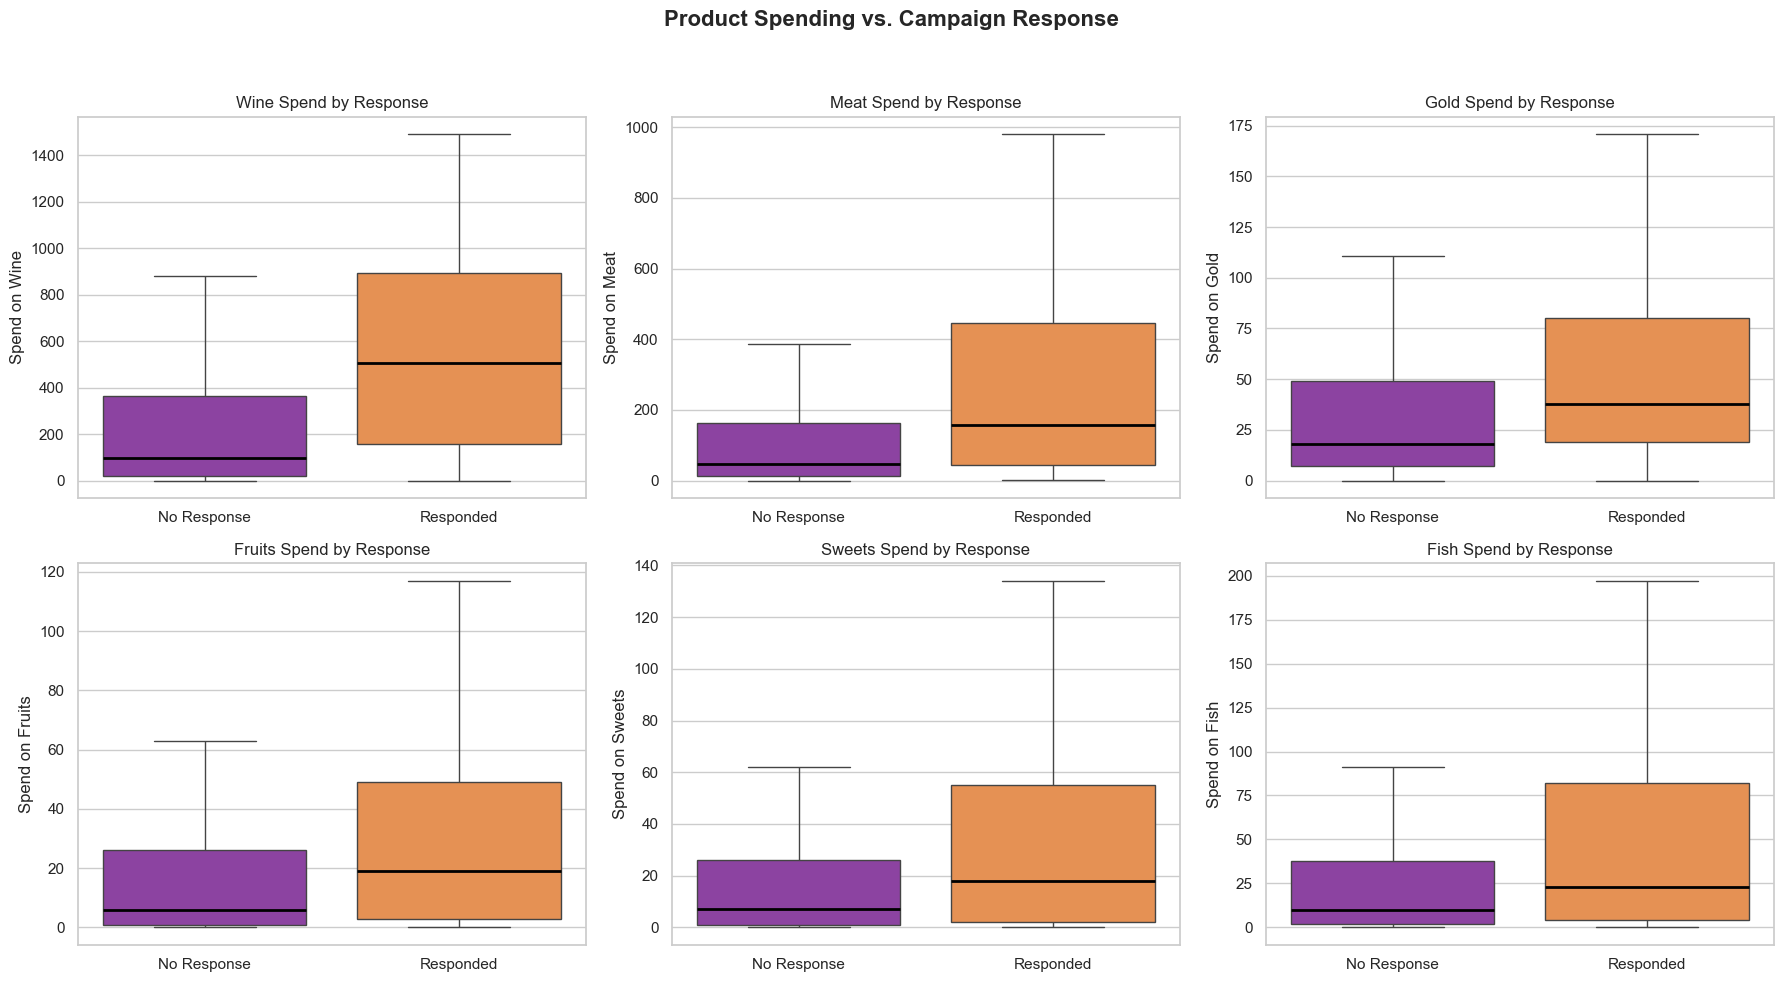

In [91]:
# Product spending columns
spend_cols = [
    ('MntWines', 'Wine'),
    ('MntMeatProducts', 'Meat'),
    ('MntGoldProds', 'Gold'),
    ('MntFruits', 'Fruits'),
    ('MntSweetProducts', 'Sweets'),
    ('MntFishProducts', 'Fish')
]

# Plot style
sns.set(style="whitegrid")
palette = ['#9433b1', '#fd8d3c']  # No Response, Responded

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Loop through and plot
for ax, (col, label) in zip(axes.flatten(), spend_cols):
    sns.boxplot(
        ax=ax,
        x='RespondedToCampaign',
        y=col,
        data=df,
        palette=palette,
        medianprops=dict(color='black', linewidth=2),
        showfliers=False
    )
    ax.set_title(f'{label} Spend by Response')
    ax.set_ylabel(f'Spend on {label}')
    ax.set_xlabel('')
    ax.set_xticklabels(['No Response', 'Responded'])

# Title and layout
plt.suptitle('Product Spending vs. Campaign Response', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("productspendingcampaignresponse", dpi=300, bbox_inches='tight')
plt.show()

In [92]:
responders = df[df['RespondedToCampaign'] == 1]
non_responders = df[df['RespondedToCampaign'] == 0]
alpha = 0.05

# Test each product column
for col, label in spend_cols:
    u, p = mannwhitneyu(responders[col], non_responders[col], alternative='two-sided')
    print(f"\n{label} Spend")
    print(f"  U statistic = {u:.2f}")
    print(f"  p-value = {p:.4f}")
    if p < alpha:
        print("Result: Reject the null hypothesis (significant difference)")
    else:
        print("Result: Fail to reject the null hypothesis (no significant difference)")


Wine Spend
  U statistic = 713377.50
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Meat Spend
  U statistic = 668886.00
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Gold Spend
  U statistic = 637255.00
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Fruits Spend
  U statistic = 585584.00
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Sweets Spend
  U statistic = 580980.50
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)

Fish Spend
  U statistic = 572118.50
  p-value = 0.0000
Result: Reject the null hypothesis (significant difference)


###  Behavior → Campaign Response: Summary & Key Findings
In this section, we examined how different customer behaviors relate to their likelihood of responding to marketing campaigns. These behavioral metrics offer actionable insights into the habits and preferences of campaign responders versus non-responders.

1. Engagement & Loyalty Metrics (Recency, Frequency, Tenure)
Customers who responded to campaigns generally had lower recency, meaning they had made purchases more recently.
Responders also tended to have more frequent purchases and longer tenure with the company.
These differences were statistically significant, suggesting that recent and loyal customers are more receptive to campaigns.

2. Channel Usage
Responders showed higher usage of web, catalog, and store channels.
However, Non-responders website visits were slightly higher than responders. 
All of these differences were also statistically significant. 

3. Discount Usage
Customers who responded to the campaign had a lower median number of purchases made with discounts compared to non-responders.
Campaign response may be driven more by engagement or product affinity than by promotional offers.

4. Product Spend Behavior
Across all product categories, customers who responded to the campaign consistently spent more than those who did not respond.
The median spending is clearly higher among responders — especially notable for:
Wine, Meat Products, Gold. But the trend also holds across the other categories: Fruits, Sweets,Fish. The differences were also statistically significant.


# LRFM Analysis

LRFM Analysis 
- L (Length)	How long a customer has been with the company (today – enrollment date)
- R (Recency)	Days since last purchase
- F (Frequency)	Total number of purchases (sum of Web, Catalog, Store)
- M (Monetary)	Total amount spent on all products

"LRFM stands for Length, Recency, Frequency, and Monetary. It’s a data-driven method that allows businesses to gain deep insight into their customer base. By analyzing when customer first made a purchase (Length), when customer last made a purchase (Recency), how often customer make purchase (Frequency), and how much money they spend (Monetary); business can segment and target their customer more effectively. This not only boosts profitability but also enhances customer satisfaction and loyalty."

We will base our method on this article https://medium.com/@arinkistian/unpacking-retail-success-the-lrfm-data-story-with-python-da503189ea2b

- New Cust Low Value: New customers with low recency, frequency, and monetary engagement.
- New Cust High Value: New customers with high recency, frequency, and monetary engagement.
- Old Cust Inactive: Long-time customers with low recency, frequency, and monetary engagement.
- At Risk: Old customers with low recency, low frequency, and high monetary engagement (indicating they were previously active but have become less engaged).
- Need Attention: Old customers with high recency, high frequency, and high monetary engagement (indicating they were previously active and remain highly engaged).
- Loyal Cust: Long-time customers with high recency, frequency, and monetary engagement.
- Potential Loyal Cust: Long-time customers with high recency and high frequency but lower monetary engagement.
- Reactivated Old Cust: Customers who were inactive but have recently re-engaged.


In [93]:
#L: Length of Relationship
# Cutoff date = day of analysis (can be set to 2014-12-06)
cutoff_date = pd.to_datetime('2014-12-06')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Length'] = (cutoff_date - df['Dt_Customer']).dt.days

In [94]:
df['Length'].describe()

count    2210.000000
mean      512.600905
std       232.325066
min         0.000000
25%       341.000000
50%       513.000000
75%       686.000000
max      1063.000000
Name: Length, dtype: float64

As mentioned before if Recency > Length, it would not make sense. So let's find out all of the cases where this is true. 

In [95]:
df[df['Recency'] > df['Length']]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,CatalogPurchaseShare,Wines_Share,Fruits_Share,MeatProducts_Share,FishProducts_Share,SweetProducts_Share,GoldProds_Share,RespondedToCampaign,Age_Bin,Length
38,8595,1973,Graduation,Widow,42429.0,0,1,2014-11-02,99,55,...,0.200000,0.820896,0.000000,0.089552,0.029851,0.000000,0.059701,0,36–45,34
50,8614,1957,Graduation,Widow,65486.0,0,1,2014-12-05,29,245,...,0.125000,0.483235,0.037475,0.246548,0.072978,0.132150,0.027613,0,56–65,1
88,8504,1973,Graduation,Married,79593.0,0,0,2014-12-05,70,350,...,0.333333,0.256223,0.043924,0.415813,0.080527,0.097365,0.106149,1,36–45,1
129,11051,1956,PhD,Together,77376.0,1,1,2014-10-05,72,492,...,0.157895,0.744327,0.028744,0.166415,0.024206,0.018154,0.018154,0,56–65,62
153,92,1988,Graduation,Alone,34176.0,1,0,2014-12-05,12,5,...,0.000000,0.056180,0.078652,0.269663,0.213483,0.157303,0.224719,0,26–35,1
180,7698,1976,PhD,Married,51650.0,0,1,2014-11-05,81,152,...,0.111111,0.795812,0.015707,0.115183,0.010471,0.026178,0.036649,0,36–45,31
181,3559,1988,2n Cycle,Married,16248.0,1,0,2014-10-05,77,12,...,0.166667,0.210526,0.192982,0.175439,0.052632,0.210526,0.157895,0,26–35,62
216,7264,1978,2n Cycle,Single,52195.0,2,1,2014-12-05,2,12,...,0.000000,0.705882,0.000000,0.235294,0.000000,0.000000,0.058824,0,36–45,1
220,1755,1988,2n Cycle,Together,45204.0,1,0,2014-11-04,93,30,...,0.166667,0.263158,0.096491,0.219298,0.254386,0.008772,0.157895,0,26–35,32
288,10102,1966,Graduation,Widow,79946.0,0,0,2014-12-05,19,395,...,0.523810,0.267253,0.123816,0.382273,0.112314,0.095399,0.018945,0,46–55,1


The logical assumption to make here is that Dt_Customer according to the dictionary is the Date of customer's enrollment with the company. This does not mean that their first purchase was this date or even recorded in the dataset. Therefore it is possible that customers make a purchase without a membership or join the supermarket as a member. We cannot assume that Dt_Customer is the same as the first time a customer made a purchase. This probably affects not only the 46 customers, but the rest of the dataset as we cannot differentiate the first purchase a customer made or the first time a customer became a member. So in further analysis, we will just make a disclaimer. We want to move on to the LRFM Segmentation. However, The Length score will not be accurate. 

In [96]:
#Creating a dedicated dataframe for LRFM analysis 
lrfm_df = df[['ID', 'Customer_Length', 'Recency', 'TotalPurchases', 'Total_Money_Spent']].copy()
lrfm_df.columns = ['ID', 'Length', 'Recency', 'Frequency', 'Monetary']
display(lrfm_df)

,ID,Length,Recency,Frequency,Monetary
0,5524,971,58,22,1617
1,2174,125,38,4,27
2,4141,472,26,20,776
3,6182,65,26,6,53
4,5324,321,94,14,422
...,...,...,...,...,...
2235,10870,541,46,16,1341
2236,4001,61,56,15,444
2237,7270,315,91,18,1241
2238,8235,316,8,21,843


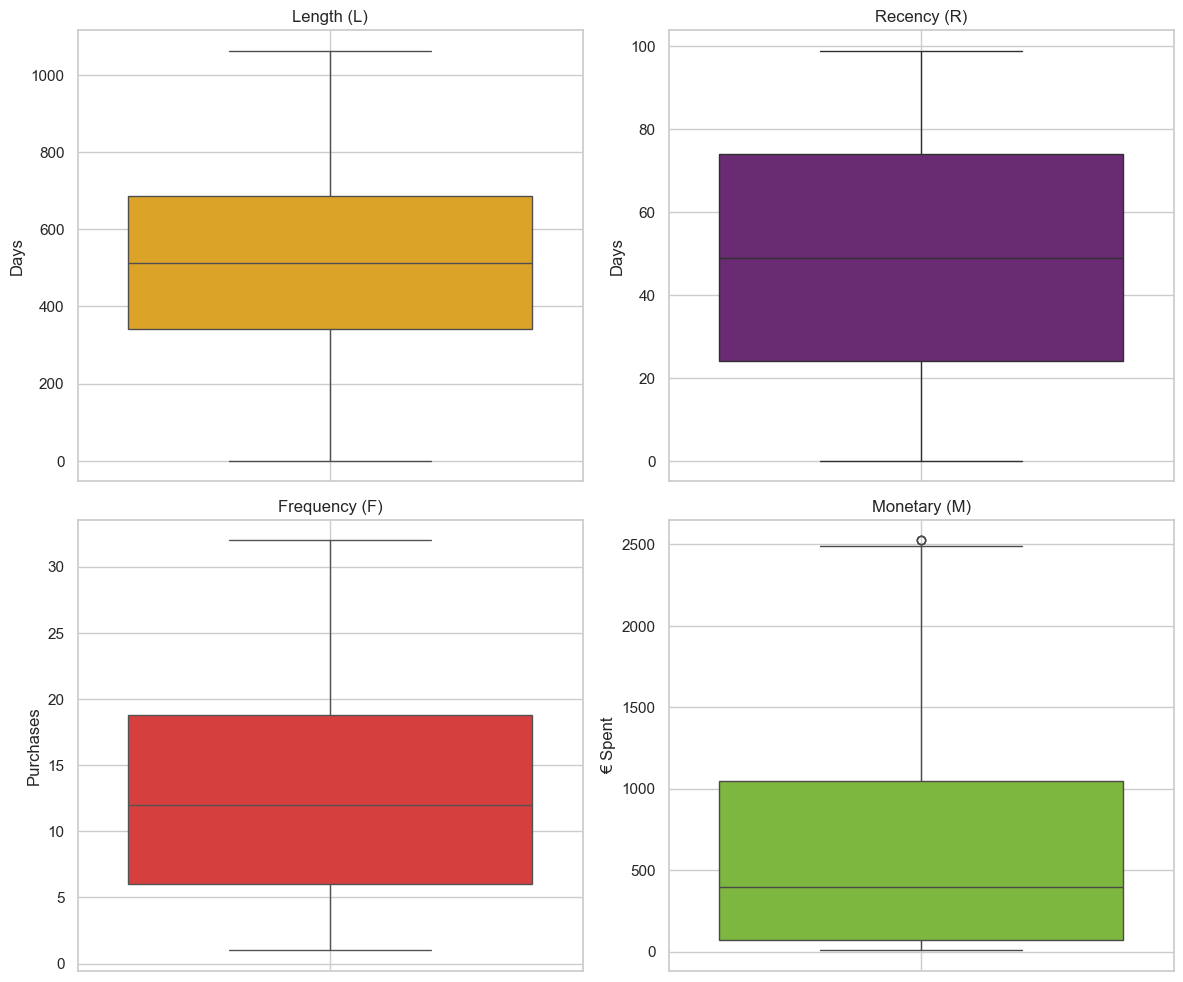

In [97]:
# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Custom colors
orange = '#f8af0c'
neon_pink = '#71207f'
vivid_red = '#ee2826'
green = '#7dcb2b'

# Boxplot for Length (L)
sns.boxplot(y=lrfm_df['Length'], ax=axes[0, 0], color=orange)
axes[0, 0].set_title('Length (L)')
axes[0, 0].set_ylabel('Days')
axes[0, 0].grid(True)

# Boxplot for Recency (R)
sns.boxplot(y=lrfm_df['Recency'], ax=axes[0, 1], color=neon_pink)
axes[0, 1].set_title('Recency (R)')
axes[0, 1].set_ylabel('Days')
axes[0, 1].grid(True)

# Boxplot for Frequency (F)
sns.boxplot(y=lrfm_df['Frequency'], ax=axes[1, 0], color=vivid_red)
axes[1, 0].set_title('Frequency (F)')
axes[1, 0].set_ylabel('Purchases')
axes[1, 0].grid(True)

# Boxplot for Monetary (M)
sns.boxplot(y=lrfm_df['Monetary'], ax=axes[1, 1], color=green)
axes[1, 1].set_title('Monetary (M)')
axes[1, 1].set_ylabel('€ Spent')
axes[1, 1].grid(True)

# Layout and save
plt.tight_layout()
plt.savefig("lrfmdistribution.png", dpi=300, bbox_inches='tight')
plt.show()

In [98]:
# For Length and Frequency and Monetary: higher = better → ascending=False
# For Recency: lower = better → ascending=True

# Quintile-based LRFM scoring
lrfm_df['L_score'] = pd.qcut(lrfm_df['Length'], q=5, labels=[1, 2, 3, 4, 5])
lrfm_df['R_score'] = pd.qcut(lrfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])  # reverse
lrfm_df['F_score'] = pd.qcut(lrfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
lrfm_df['M_score'] = pd.qcut(lrfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Convert to integer
score_cols = ['L_score', 'R_score', 'F_score', 'M_score']
lrfm_df[score_cols] = lrfm_df[score_cols].astype(int)
lrfm_df

,ID,Length,Recency,Frequency,Monetary,L_score,R_score,F_score,M_score
0,5524,971,58,22,1617,5,3,5,5
1,2174,125,38,4,27,1,4,1,1
2,4141,472,26,20,776,3,4,4,4
3,6182,65,26,6,53,1,4,2,1
4,5324,321,94,14,422,2,1,3,3
...,...,...,...,...,...,...,...,...,...
2235,10870,541,46,16,1341,3,3,4,5
2236,4001,61,56,15,444,1,3,3,3
2237,7270,315,91,18,1241,2,1,4,5
2238,8235,316,8,21,843,2,5,5,4


In [99]:
def map_segment(row):
    L, R, F, M = row['L_score'], row['R_score'], row['F_score'], row['M_score']

    # 1. Loyal Cust: All scores high (3–5)
    if L >= 3 and R >= 3 and F >= 3 and M >= 3:
        return 'Loyal Cust'

    # 2. Need Attention: L high, R low, F & M high
    elif L >= 3 and R <= 2 and F >= 3 and M >= 3:
        return 'Need Attention'

    # 3. Potential Loyal Cust: L, R, F high; M low
    elif L >= 3 and R >= 3 and F >= 3 and M <= 2:
        return 'Potential Loyal Cust'

    # 4. Reactivated Old Cust: L & R high, F low
    elif L >= 3 and R >= 3 and F <= 2:
        return 'Reactivated Old Cust'

    # 5. At Risk: L high, R low, no strict F/M conditions
    elif L >= 3 and R <= 2 and F <= 2 and M >= 3:
        return 'At Risk'

    # 6. Old Cust Inactive: L high, R, F, M all low
    elif L >= 3 and R <= 2 and F <= 2 and M <= 2:
        return 'Old Cust Inactive'

    # 7. New Cust High Value: L low, M high
    elif L <= 2 and M >= 3:
        return 'New Cust High Value'

    # 8. New Cust Low Value: L low, M low
    elif L <= 2 and M <= 2:
        return 'New Cust Low Value'

    else:
        return 'Others'
    
lrfm_df['Segment'] = lrfm_df.apply(map_segment, axis=1)
lrfm_df['Segment'].value_counts()

Segment
Loyal Cust              492
New Cust High Value     469
New Cust Low Value      417
Need Attention          341
Reactivated Old Cust    289
Old Cust Inactive       187
At Risk                  15
Name: count, dtype: int64

In [100]:
#Visual to see what minimum scores are for segmentation
min_valid_scores_by_segment = {
    'Loyal Cust': (3, 3, 3, 3),              # All high
    'Need Attention': (3, 1, 3, 3),          # R low, F & M high
    'Potential Loyal Cust': (3, 3, 3, 1),    # M low
    'Reactivated Old Cust': (3, 3, 1, 1),    # F low
    'At Risk': (3, 1, 1, 3),                 # F & R low, M high
    'Old Cust Inactive': (3, 1, 1, 1),       # All low
    'New Cust High Value': (1, 1, 1, 3),     # L low, M high
    'New Cust Low Value': (1, 1, 1, 1)       # L low, M low
}

# Calculate total minimum LRFM scores (out of 20)
min_lrfm_totals = {segment: sum(scores) for segment, scores in min_valid_scores_by_segment.items()}

# Create DataFrame
df_segment_min_lrfm = pd.DataFrame([
    {'Segment': seg, 'Customer Count': segment_counts[seg], 'Min Valid LRFM Score': min_lrfm_totals[seg]}
    for seg in segment_counts
])

# Sort by LRFM score
df_segment_min_lrfm = df_segment_min_lrfm.sort_values(by='Min Valid LRFM Score', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_segment_min_lrfm, y='Segment', x='Min Valid LRFM Score', palette='magma')
plt.title('Minimum Valid LRFM Score by Segment (Rule-Based)')
plt.xlabel('Minimum LRFM Score (Out of 20)')
plt.ylabel('Segment')
plt.xlim(0, 20)
plt.tight_layout()
plt.savefig("lrfmchartexample", dpi=300, bbox_inches='tight')

plt.show()

NameError: name 'segment_counts' is not defined

In [ ]:
lrfm_df

,ID,Length,Recency,Frequency,Monetary,L_score,R_score,F_score,M_score,Segment
0,5524,971,58,22,1617,5,3,5,5,Loyal Cust
1,2174,125,38,4,27,1,4,1,1,New Cust Low Value
2,4141,472,26,20,776,3,4,4,4,Loyal Cust
3,6182,65,26,6,53,1,4,2,1,New Cust Low Value
4,5324,321,94,14,422,2,1,3,3,New Cust High Value
...,...,...,...,...,...,...,...,...,...,...
2235,10870,541,46,16,1341,3,3,4,5,Loyal Cust
2236,4001,61,56,15,444,1,3,3,3,New Cust High Value
2237,7270,315,91,18,1241,2,1,4,5,New Cust High Value
2238,8235,316,8,21,843,2,5,5,4,New Cust High Value


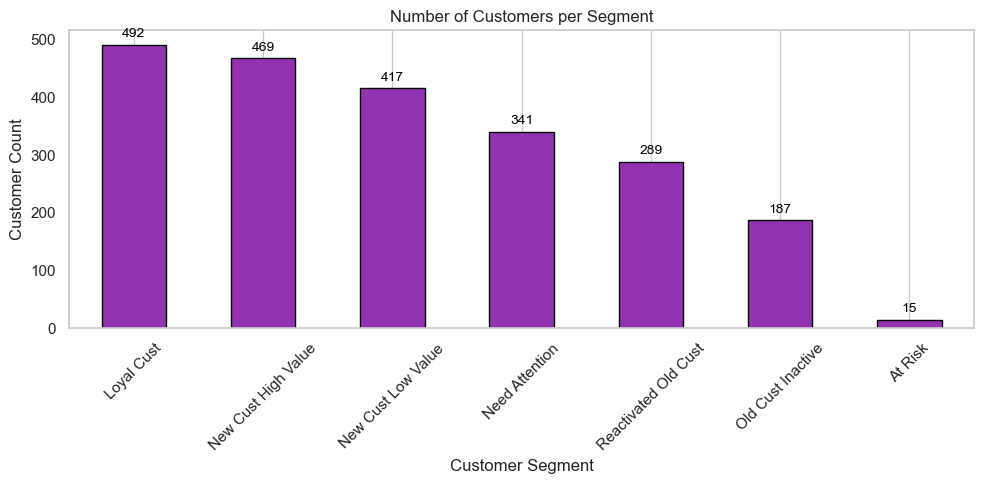

In [ ]:
segment_counts = lrfm_df['Segment'].value_counts().sort_values(ascending=False)

# Create bar plot
ax = segment_counts.plot(kind='bar', figsize=(10, 5), color='#9433b1', edgecolor='black')
plt.title('Number of Customers per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=10, color='black')
plt.savefig("numberofcustomerspersegment", dpi=300, bbox_inches='tight')

plt.show()

,count,sum,ResponseRate
Segment,,,
New Cust High Value,469,184,0.39
Loyal Cust,492,188,0.38
Need Attention,341,108,0.32
At Risk,15,3,0.20
Reactivated Old Cust,289,57,0.20
New Cust Low Value,417,48,0.12
Old Cust Inactive,187,17,0.09


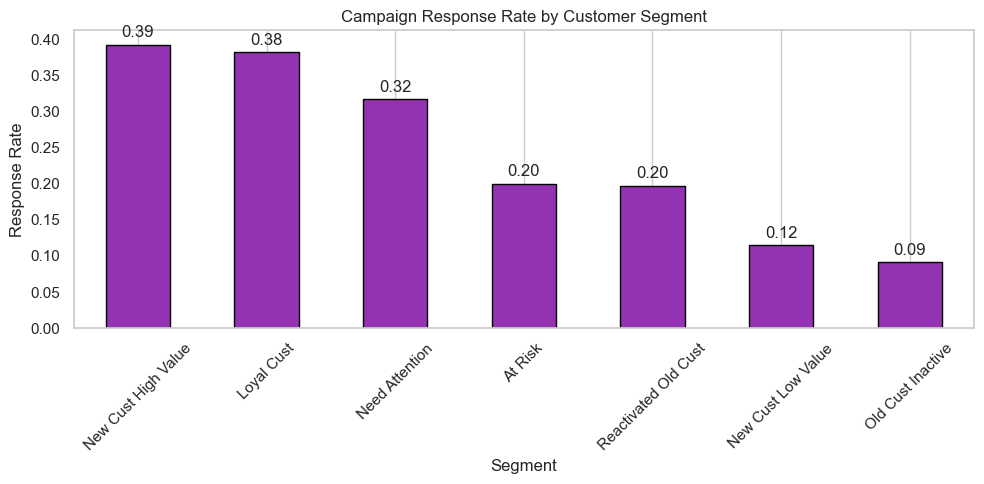

In [ ]:
#df = df.merge(lrfm_df[['ID', 'Segment']], on='ID', how='left') #Skip merging if Segment is already in df
response_by_segment = df.groupby('Segment')['RespondedToCampaign'].agg(['count', 'sum'])
response_by_segment['ResponseRate'] = response_by_segment['sum'] / response_by_segment['count']
response_by_segment.sort_values('ResponseRate', ascending=False, inplace=True)

display(response_by_segment.round(2))

# Plotting
ax = response_by_segment['ResponseRate'].plot(
    kind='bar', figsize=(10, 5), color='#9433b1', edgecolor='black'
)
plt.title('Campaign Response Rate by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Response Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.savefig("segmentresponserate", dpi=300, bbox_inches='tight')

plt.show()

# Summary, Insights and Recommendations

## Summary of Findings

From our analysis of the supermarket customer dataset, we identified key differences in campaign response behavior across demographic and behavioral factors. We also segmented customers using LRFM metrics to assess value and engagement levels.

Key findings include:
- The overall campaign response rate was relatively low, but varied significantly across customer segments.
- The highest response rates were found in:
  - **New High-Value Customers** (39%)
  - **Loyal Customers** (38%)
  - **Customers Who Need Attention** (32%)
- The lowest response rates were found in:
  - **Old Inactive Customers** (9%)
  - **New Low-Value Customers** (12%)

---

## Customer Profile  
**Who responds to campaigns?**

Customers more likely to respond to marketing campaigns tend to have the following characteristics:
- **Age** has a significant but non-linear effect. Both younger and older customers respond more than middle-aged groups.
- **Higher income** customers are more likely to respond, though this relationship weakens when extreme outliers are included.
- Customers with **higher education levels** respond more frequently.
- Customers who are **not married** and have **no children** tend to engage more.
- **Behavioral patterns** such as recent purchases and active use of store or online channels also correlate with higher response rates.

---

## Recommendations

1. **Prioritize campaign targeting toward high-response segments**  
   Focus on **New High-Value**, **Loyal**, and **Need Attention** customer segments for campaign investment.

2. **Design differentiated campaigns for each segment**  
   - *Loyal Customers*: Offer loyalty rewards, exclusive early access, or personalized messages.  
   - *New High-Value Customers*: Use onboarding bundles and welcome promotions.  
   - *Customers Who Need Attention*: Run re-engagement campaigns such as limited-time discounts or reminders.

3. **Use demographic-informed messaging**  
   - Tailor messages based on generational preferences (e.g., convenience-focused for younger, health-focused for older).  
   - Highlight quality, exclusivity, or sustainability to appeal to highly educated and high-income customers.




## Conclusion

Marketing efforts can target the most responsive and valuable customer segments. This allows the supermarket to increase campaign effectiveness and improve customer retention. The LRFM analysis enables data-driven decision-making for campaign personalization and customer management.
